# Make Figures

### Chirag Kumar - 20.09.2020

### This script develops and tests interventions for COVID-19 spread simulated using an ABM.

## Prep Workspace

### Import and Set-up Packages: Python and R

In [1]:
# python packages
import pandas as pd # for dataframes
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
import matplotlib as mpl # for matplotlib settings
import os # for directories
from scipy import stats
#import rpy2 # for running r commands - namely plotting
import scipy as sp # useful to have the whole library to access
import pickle # for serializing objects

In [2]:
# configure plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]
font = {'family' : 'Nimbus Roman',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

### Define Directories

In [3]:
# define directories

# this is a hack to be able to refer to relative locations
if '__file__' not in globals():
    __file__ = '.'

inp_dir = os.path.abspath(os.path.dirname(__file__))
data_dir = os.path.abspath(os.path.join(os.path.dirname(__file__),
                                        'Data'))
out_dir = os.path.abspath(os.path.join(os.path.dirname(__file__),
                                       'Result Files'))
fig_dir = os.path.abspath(os.path.join(os.path.dirname(__file__),
                                          'Figures'))

## Fig. S1: Disease Course without Intervention

In [4]:
replicates = 200
max_steps = 201
N_t = 5000

In [5]:
with open(os.path.join(out_dir,
                           'NoMitigation/5000Agents-200Replicates-SIRD_counts.pickle'),
              'rb') as openfile:
        sird_counts_u = pickle.load(openfile)

In [6]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-India.pickle'),
              'rb') as openfile:
        sird_counts_i = pickle.load(openfile)

In [7]:
np.percentile(sird_counts_u[:, 6, -1] / (sird_counts_u[:, 4, -1] + sird_counts_u[:, 6, -1]), q = 50)

0.026584734823016452

In [9]:
np.percentile(np.sort(100 - sird_counts_u[:, 0, -1]) - np.sort(100 - r_u_w[0][:, 0, -1]), q = 50)

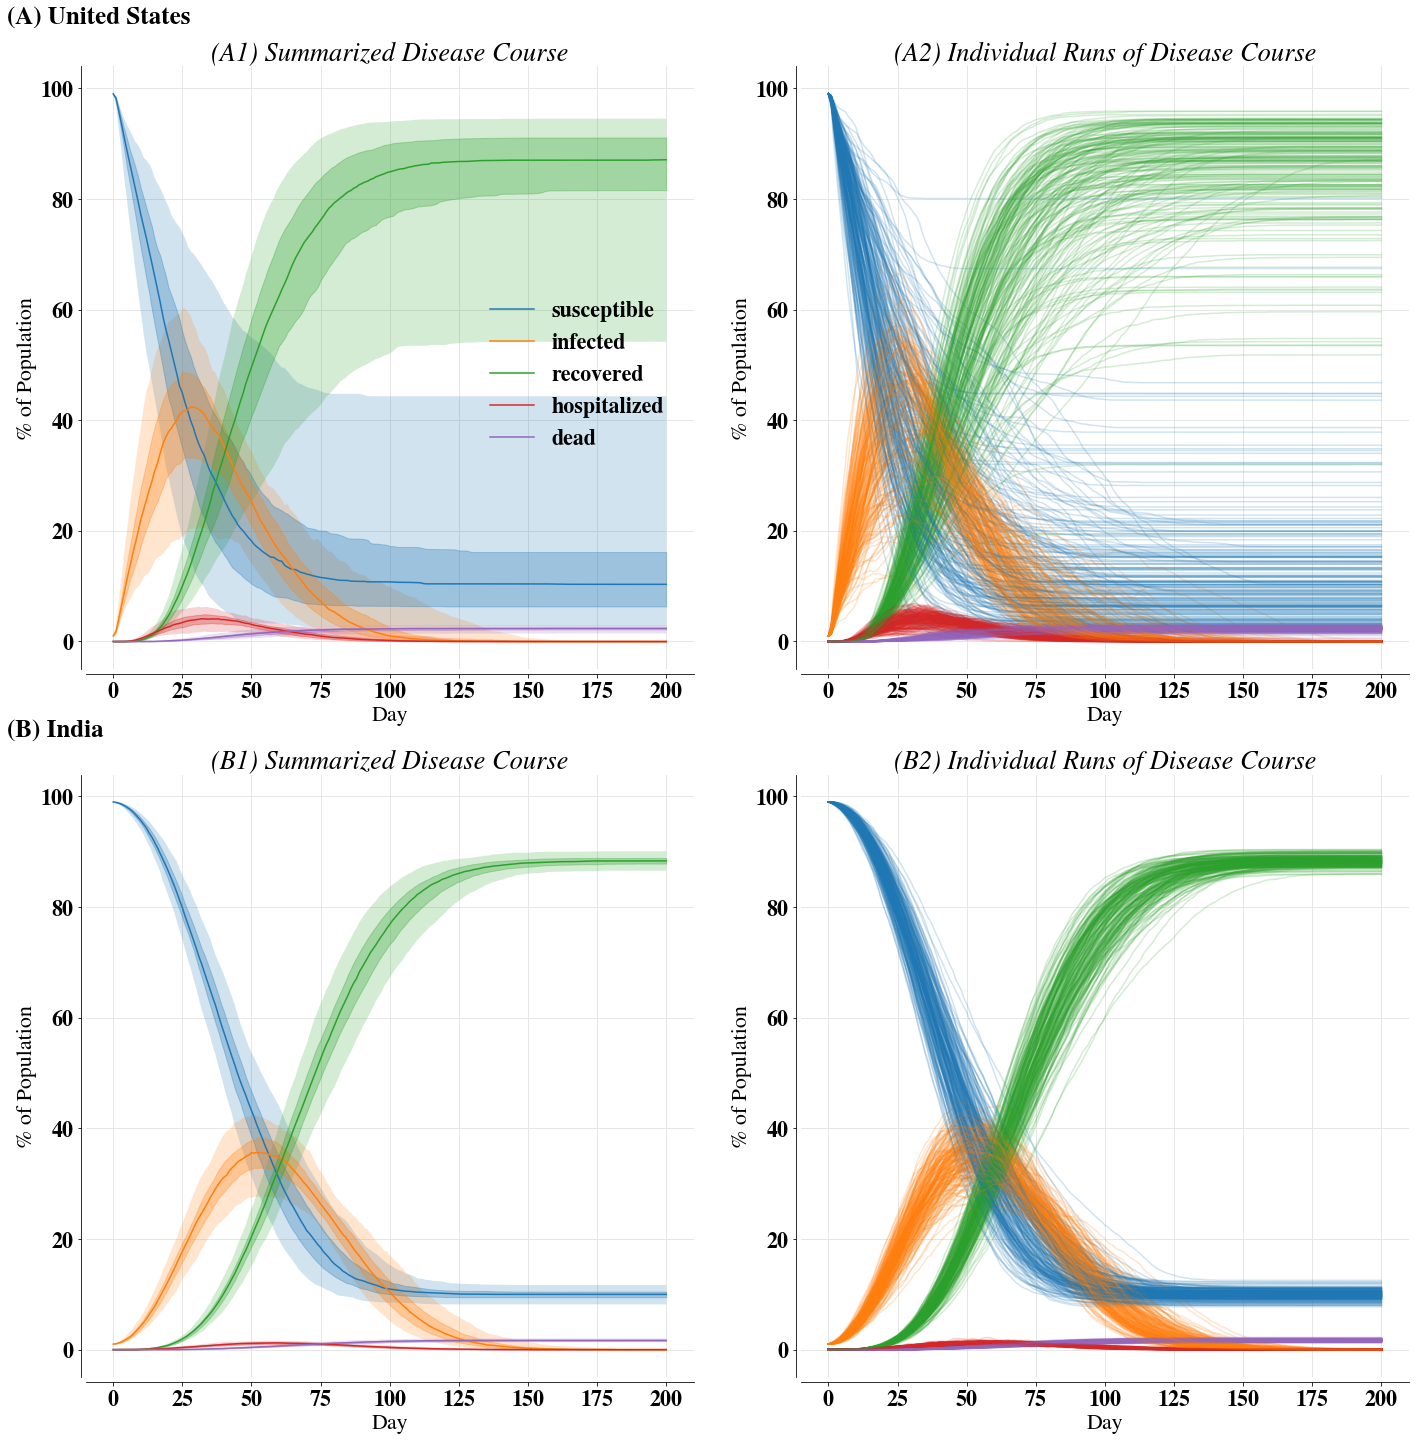

In [8]:
# US
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(221)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)
ax1.plot(np.median(sird_counts_u, axis = 0)[0], label = 'susceptible');
ax1.plot(np.median(sird_counts_u, axis = 0)[3], label = 'infected');
ax1.plot(np.median(sird_counts_u, axis = 0)[4], label = 'recovered');
ax1.plot(np.median(sird_counts_u, axis = 0)[5], label = 'hospitalized');
ax1.plot(np.median(sird_counts_u, axis = 0)[6], label = 'dead');
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 2.5)[0],
                 np.percentile(sird_counts_u, axis = 0, q = 97.5)[0], alpha = 0.2)
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 2.5)[3],
                 np.percentile(sird_counts_u, axis = 0, q = 97.5)[3], alpha = 0.2)
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 2.5)[4],
                 np.percentile(sird_counts_u, axis = 0, q = 97.5)[4], alpha = 0.2)
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 2.5)[5],
                 np.percentile(sird_counts_u, axis = 0, q = 97.5)[5], alpha = 0.2)
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 2.5)[6],
                 np.percentile(sird_counts_u, axis = 0, q = 97.5)[6], alpha = 0.2)

ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 25)[0],
                 np.percentile(sird_counts_u, axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 25)[3],
                 np.percentile(sird_counts_u, axis = 0, q = 75)[3], alpha = 0.3, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 25)[4],
                 np.percentile(sird_counts_u, axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 25)[5],
                 np.percentile(sird_counts_u, axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(3))
ax1.fill_between(range(max_steps), np.percentile(sird_counts_u, axis = 0, q = 25)[6],
                 np.percentile(sird_counts_u, axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))

ax1.legend(loc = (.65, .35), frameon = False, ncol = 1);
ax1.set_xlabel('Day');
ax1.set_ylabel('% of Population');
ax1.set_title('(A1) Summarized Disease Course', style = 'italic');


ax3 = fig.add_subplot(222)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

for i in range(replicates):
    ax3.plot(sird_counts_u[i, 0, :].T, c = "C{}".format(0), alpha = .2)
    ax3.plot(sird_counts_u[i, 3, :].T, c = "C{}".format(1), alpha = .2)
    ax3.plot(sird_counts_u[i, 4, :].T, c = "C{}".format(2), alpha = .2)
    ax3.plot(sird_counts_u[i, 5, :].T, c = "C{}".format(3), alpha = .2)
    ax3.plot(sird_counts_u[i, 6, :].T, c = "C{}".format(4), alpha = .2)

ax3.set_xlabel('Day');
ax3.set_ylabel('% of Population');
ax3.set_title('(A2) Individual Runs of Disease Course', style = 'italic');

# india

ax2 = fig.add_subplot(223)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)
ax2.plot(np.median(sird_counts_i, axis = 0)[0], label = 'susceptible');
ax2.plot(np.median(sird_counts_i, axis = 0)[3], label = 'infected');
ax2.plot(np.median(sird_counts_i, axis = 0)[4], label = 'recovered');
ax2.plot(np.median(sird_counts_i, axis = 0)[5], label = 'hospitalized');
ax2.plot(np.median(sird_counts_i, axis = 0)[6], label = 'dead');
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 2.5)[0],
                 np.percentile(sird_counts_i, axis = 0, q = 97.5)[0], alpha = 0.2)
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 2.5)[3],
                 np.percentile(sird_counts_i, axis = 0, q = 97.5)[3], alpha = 0.2)
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 2.5)[4],
                 np.percentile(sird_counts_i, axis = 0, q = 97.5)[4], alpha = 0.2)
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 2.5)[5],
                 np.percentile(sird_counts_i, axis = 0, q = 97.5)[5], alpha = 0.2)
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 2.5)[6],
                 np.percentile(sird_counts_i, axis = 0, q = 97.5)[6], alpha = 0.2)

ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 25)[0],
                 np.percentile(sird_counts_i, axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 25)[3],
                 np.percentile(sird_counts_i, axis = 0, q = 75)[3], alpha = 0.3, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 25)[4],
                 np.percentile(sird_counts_i, axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 25)[5],
                 np.percentile(sird_counts_i, axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(3))
ax2.fill_between(range(max_steps), np.percentile(sird_counts_i, axis = 0, q = 25)[6],
                 np.percentile(sird_counts_i, axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))

ax2.set_xlabel('Day');
ax2.set_ylabel('% of Population');
ax2.set_title('(B1) Summarized Disease Course', style = 'italic');


ax4 = fig.add_subplot(224)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

for i in range(replicates):
    ax4.plot(sird_counts_i[i, 0, :].T, c = "C{}".format(0), alpha = .2)
    ax4.plot(sird_counts_i[i, 3, :].T, c = "C{}".format(1), alpha = .2)
    ax4.plot(sird_counts_i[i, 4, :].T, c = "C{}".format(2), alpha = .2)
    ax4.plot(sird_counts_i[i, 5, :].T, c = "C{}".format(3), alpha = .2)
    ax4.plot(sird_counts_i[i, 6, :].T, c = "C{}".format(4), alpha = .2)

ax4.set_xlabel('Day');
ax4.set_ylabel('% of Population');
ax4.set_title('(B2) Individual Runs of Disease Course', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.tight_layout();

#fig.savefig(os.path.join(fig_dir, 'figS1-nomitigation.png'), dpi = 300, bbox_inches = 'tight')
#fig.savefig(os.path.join(fig_dir, 'figS1-nomitigation.pdf'), dpi = 300, bbox_inches = 'tight')

## Fig. 1: Representative Testing Scenarios

In [9]:
replicates = 200
max_steps = 201
N_t = 5000

In [10]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR.pickle'),
              'rb') as openfile:
        r_u_w = pickle.load(openfile)

In [11]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopRT-PCR.pickle'),
              'rb') as openfile:
        r_u_t = pickle.load(openfile)

In [12]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen.pickle'),
              'rb') as openfile:
        a_u_w = pickle.load(openfile)

In [13]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen.pickle'),
              'rb') as openfile:
        a_u_t = pickle.load(openfile)

In [14]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-India.pickle'),
              'rb') as openfile:
        r_i_w = pickle.load(openfile)

In [15]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopRT-PCR-India.pickle'),
              'rb') as openfile:
        r_i_t = pickle.load(openfile)

In [16]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-India.pickle'),
              'rb') as openfile:
        a_i_w = pickle.load(openfile)

In [17]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-India.pickle'),
              'rb') as openfile:
        a_i_t = pickle.load(openfile)

In [18]:
np.percentile(np.sort(a_i_w[0][:, 5, -1]) - np.sort(a_u_w[0][:, 5, -1]), q = 97.50)

2.540500000000001

In [19]:
tt1 = [np.where(a_i_w[0][i, 3, :] > 1)[0][-1] for i in range(200)]

In [21]:
tt2 = [np.where(a_r_i[0][i, 3, :] > 1)[0][-1] for i in range(200)]

In [ ]:
np.percentile(tt1, q = 50)

In [ ]:
np.percentile(tt2, q = 50)

In [ ]:
np.percentile(np.sort(tt1) - np.sort(tt2), q = 2.5)

In [ ]:
stats.median_test(a_i_w[0][:, 5, -1], a_r_i[0][:, 5, -1])

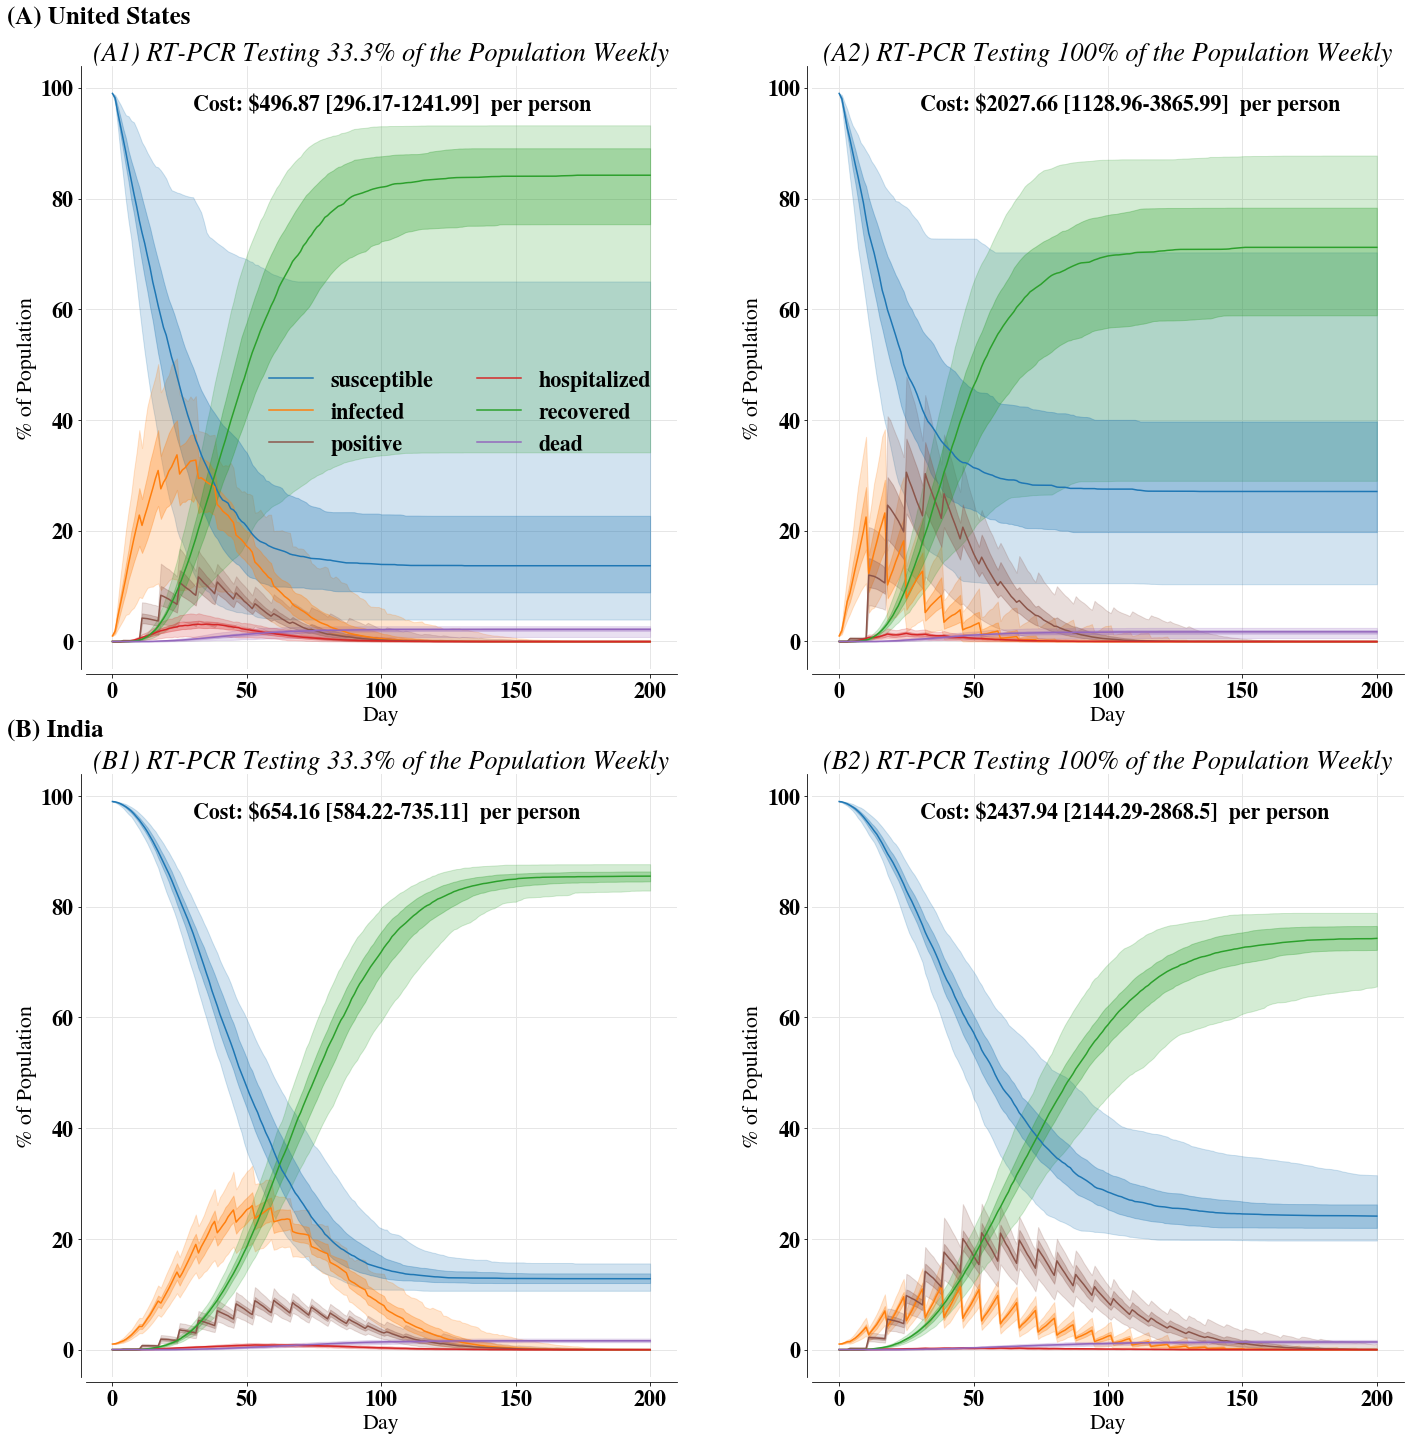

In [22]:
# US
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(222)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax1.plot(np.median(r_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax1.plot((np.median(r_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax1.plot(np.median(r_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax1.plot(np.median(r_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax1.plot(np.median(r_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax1.plot(np.median(r_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax1.text(30, 96,
         'Cost: $' + str(round(np.median(r_u_w[1]) / 5000,
                               2)) + ' [' + str(round(np.percentile(r_u_w[1], 2.5) / 5000,
                                                      2)) + '-' + str(round(np.percentile(r_u_w[1],
                                                                                          97.5) / 5000,
                                                                            2)) + '] ' + ' per person')

ax1.set_xlabel('Day');
ax1.set_ylabel('% of Population');
ax1.set_title('(A2) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

ax2 = fig.add_subplot(221)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax2.plot(np.median(r_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax2.plot((np.median(r_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax2.plot(np.median(r_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax2.plot(np.median(r_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax2.plot(np.median(r_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax2.plot(np.median(r_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax2.text(30, 96, 'Cost: $' + str(round(np.median(r_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax2.legend(loc = (.295, .34), ncol = 2, frameon = False);

ax2.set_xlabel('Day');
ax2.set_ylabel('% of Population');
ax2.set_title('(A1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



# ax3 = fig.add_subplot(424)
# ax3.spines['top'].set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax3.get_xaxis().tick_bottom()
# ax3.get_yaxis().tick_left()
# ax3.tick_params(axis = 'x', direction = 'out')
# ax3.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax3.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax3.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax3.plot(np.median(a_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax3.plot((np.median(a_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax3.plot(np.median(a_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax3.plot(np.median(a_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax3.plot(np.median(a_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax3.plot(np.median(a_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[0],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(a_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[4],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[5],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[6],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[7],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[0],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 25)[3]),
#                  (np.percentile(a_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[4],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[5],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[6],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[7],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax3.text(30, 96, 'Cost: $' + str(round(np.median(a_u_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax3.set_xlabel('Day');
# ax3.set_ylabel('% of Population');
# ax3.set_title('(A4) Antigen Testing 100% of the Population Weekly', style = 'italic');


# ax4 = fig.add_subplot(422)
# ax4.spines['top'].set_visible(False)
# ax4.spines['right'].set_visible(False)
# ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax4.get_xaxis().tick_bottom()
# ax4.get_yaxis().tick_left()
# ax4.tick_params(axis = 'x', direction = 'out')
# ax4.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax4.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax4.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax4.plot(np.median(a_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax4.plot((np.median(a_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax4.plot(np.median(a_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax4.plot(np.median(a_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax4.plot(np.median(a_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax4.plot(np.median(a_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[0],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(a_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[4],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[5],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[6],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[7],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[0],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 25)[3]),
#               (np.percentile(a_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[4],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[5],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[6],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[7],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax4.text(30, 96, 'Cost: $' + str(round(np.median(a_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax4.set_xlabel('Day');
# ax4.set_ylabel('% of Population');
# ax4.set_title('(A2) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

# india

ax5 = fig.add_subplot(224)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax5.plot(np.median(r_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax5.plot((np.median(r_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax5.plot(np.median(r_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax5.plot(np.median(r_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax5.plot(np.median(r_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax5.plot(np.median(r_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax5.text(30, 96, 'Cost: $' + str(round(np.median(r_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax5.set_xlabel('Day');
ax5.set_ylabel('% of Population');
ax5.set_title('(B2) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

ax6 = fig.add_subplot(223)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax6.plot(np.median(r_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax6.plot((np.median(r_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax6.plot(np.median(r_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax6.plot(np.median(r_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax6.plot(np.median(r_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax6.plot(np.median(r_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax6.text(30, 96, 'Cost: $' + str(round(np.median(r_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax6.set_xlabel('Day');
ax6.set_ylabel('% of Population');
ax6.set_title('(B1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



# ax7 = fig.add_subplot(428)
# ax7.spines['top'].set_visible(False)
# ax7.spines['right'].set_visible(False)
# ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax7.get_xaxis().tick_bottom()
# ax7.get_yaxis().tick_left()
# ax7.tick_params(axis = 'x', direction = 'out')
# ax7.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax7.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax7.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax7.plot(np.median(a_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax7.plot((np.median(a_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax7.plot(np.median(a_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax7.plot(np.median(a_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax7.plot(np.median(a_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax7.plot(np.median(a_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[0],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(a_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[4],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[5],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[6],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[7],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[0],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 25)[3]),
#                  (np.percentile(a_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[4],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[5],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[6],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[7],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax7.text(30, 96, 'Cost: $' + str(round(np.median(a_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax7.set_xlabel('Day');
# ax7.set_ylabel('% of Population');
# ax7.set_title('(B4) Antigen Testing 100% of the Population Weekly', style = 'italic');


# ax8 = fig.add_subplot(426)
# ax8.spines['top'].set_visible(False)
# ax8.spines['right'].set_visible(False)
# ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax8.get_xaxis().tick_bottom()
# ax8.get_yaxis().tick_left()
# ax8.tick_params(axis = 'x', direction = 'out')
# ax8.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax8.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax8.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax8.plot(np.median(a_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax8.plot((np.median(a_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax8.plot(np.median(a_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax8.plot(np.median(a_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax8.plot(np.median(a_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax8.plot(np.median(a_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[0],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(a_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[4],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[5],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[6],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[7],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[0],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 25)[3]),
#               (np.percentile(a_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[4],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[5],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[6],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[7],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax8.text(30, 96, 'Cost: $' + str(round(np.median(a_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax8.set_xlabel('Day');
# ax8.set_ylabel('% of Population');
# ax8.set_title('(B2) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'fig1A-representative-rt-pcr-hr.png'), dpi = 600, bbox_inches = 'tight')
#fig.savefig(os.path.join(fig_dir, 'fig1A-representative-rt-pcr.pdf'), dpi = 300, bbox_inches = 'tight')

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


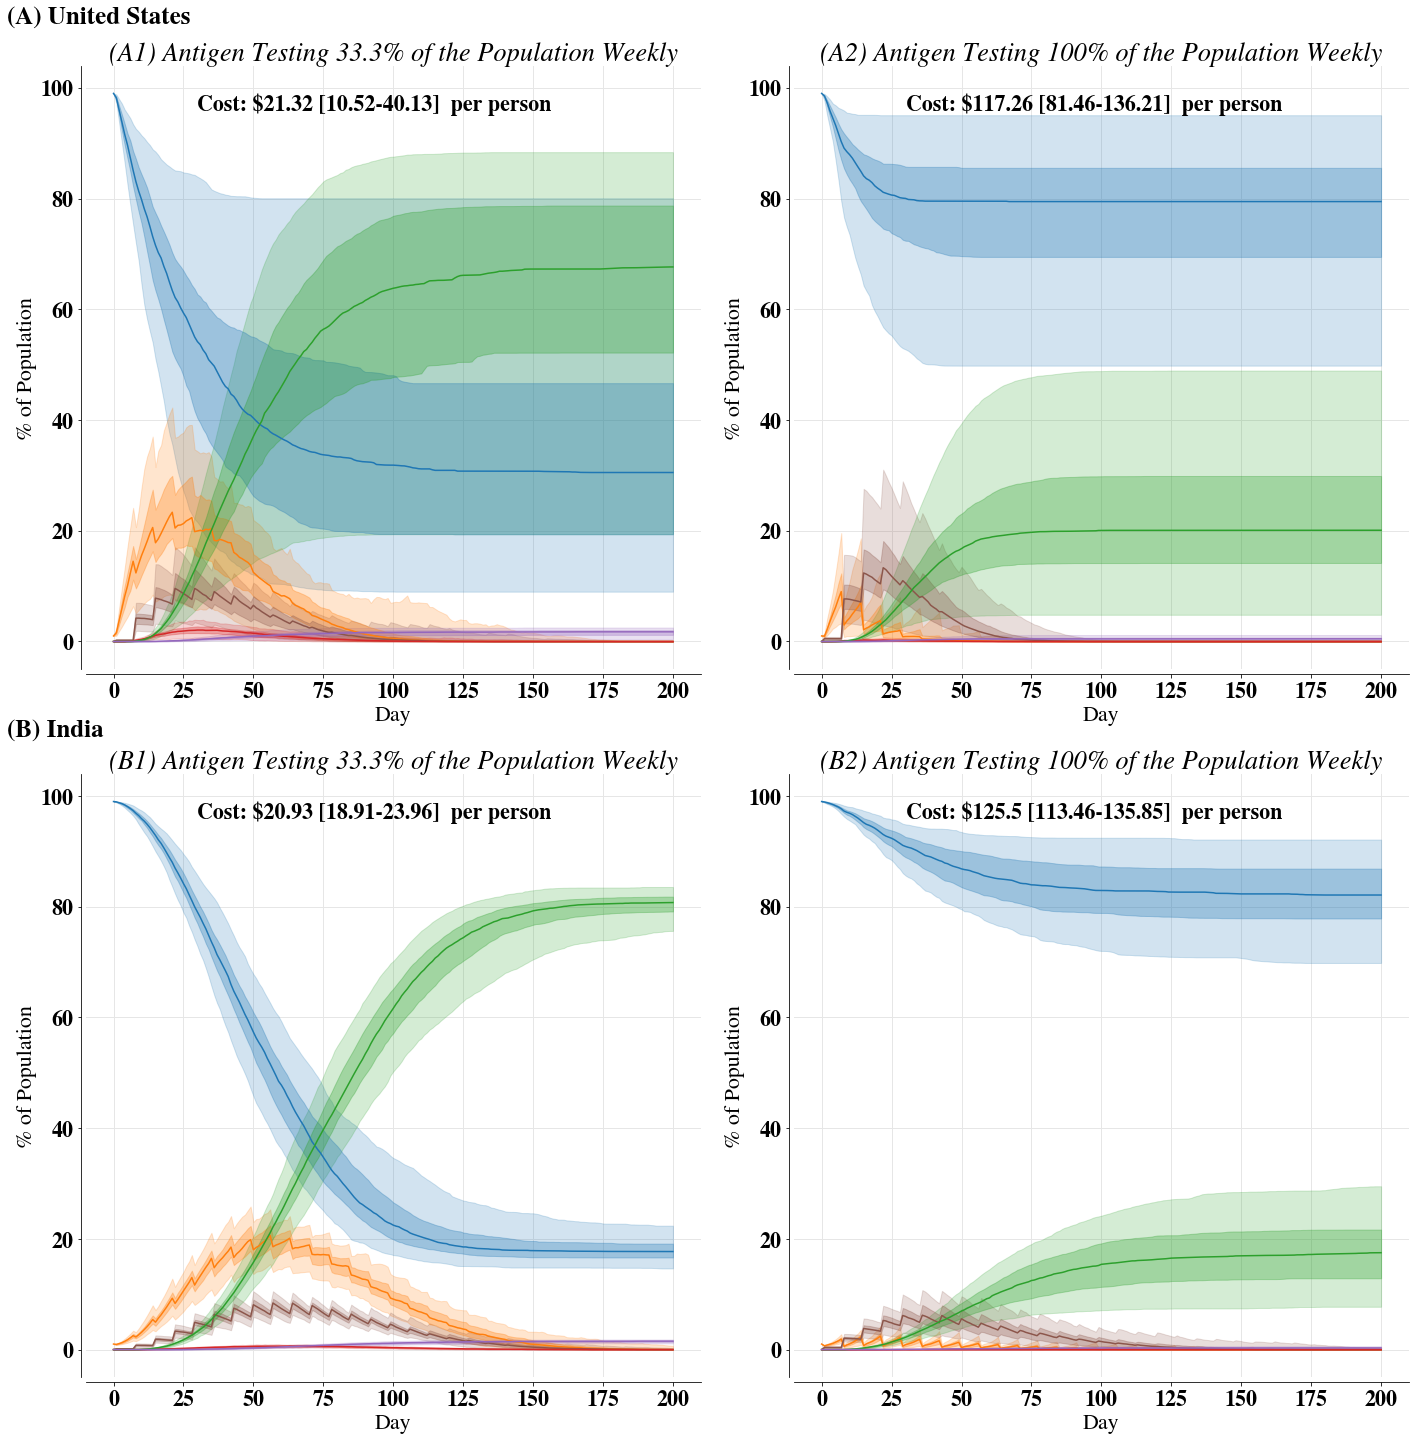

In [46]:
# US
fig = plt.figure(figsize = (20, 20))
# ax1 = fig.add_subplot(423)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax1.get_xaxis().tick_bottom()
# ax1.get_yaxis().tick_left()
# ax1.tick_params(axis = 'x', direction = 'out')
# ax1.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax1.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax1.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax1.plot(np.median(r_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax1.plot((np.median(r_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax1.plot(np.median(r_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax1.plot(np.median(r_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax1.plot(np.median(r_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax1.plot(np.median(r_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[0],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(r_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[4],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[5],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[6],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[7],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[0],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 25)[3]),
#                  (np.percentile(r_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[4],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[5],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[6],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[7],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax1.text(30, 96,
#          'Cost: $' + str(round(np.median(r_u_w[1]) / 5000,
#                                2)) + ' [' + str(round(np.percentile(r_u_w[1], 2.5) / 5000,
#                                                       2)) + '-' + str(round(np.percentile(r_u_w[1],
#                                                                                           97.5) / 5000,
#                                                                             2)) + '] ' + ' per person')

# ax1.set_xlabel('Day');
# ax1.set_ylabel('% of Population');
# ax1.set_title('(A3) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

# ax2 = fig.add_subplot(421)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax2.get_xaxis().tick_bottom()
# ax2.get_yaxis().tick_left()
# ax2.tick_params(axis = 'x', direction = 'out')
# ax2.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax2.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax2.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax2.plot(np.median(r_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax2.plot((np.median(r_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax2.plot(np.median(r_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax2.plot(np.median(r_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax2.plot(np.median(r_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax2.plot(np.median(r_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[0],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(r_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[4],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[5],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[6],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[7],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[0],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 25)[3]),
#                  (np.percentile(r_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[4],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[5],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[6],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[7],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax2.text(30, 96, 'Cost: $' + str(round(np.median(r_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax2.legend(loc = (.295, .34), ncol = 2, frameon = False);

# ax2.set_xlabel('Day');
# ax2.set_ylabel('% of Population');
# ax2.set_title('(A1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



ax3 = fig.add_subplot(222)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax3.plot(np.median(a_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax3.plot((np.median(a_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax3.plot(np.median(a_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax3.plot(np.median(a_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax3.plot(np.median(a_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax3.plot(np.median(a_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[0],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[4],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[5],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[6],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[7],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax3.text(30, 96, 'Cost: $' + str(round(np.median(a_u_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax3.set_xlabel('Day');
ax3.set_ylabel('% of Population');
ax3.set_title('(A2) Antigen Testing 100% of the Population Weekly', style = 'italic');


ax4 = fig.add_subplot(221)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax4.plot(np.median(a_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax4.plot((np.median(a_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax4.plot(np.median(a_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax4.plot(np.median(a_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax4.plot(np.median(a_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax4.plot(np.median(a_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[0],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 25)[3]),
              (np.percentile(a_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[4],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[5],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[6],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[7],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax4.text(30, 96, 'Cost: $' + str(round(np.median(a_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax4.set_xlabel('Day');
ax4.set_ylabel('% of Population');
ax4.set_title('(A1) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

# india

# ax5 = fig.add_subplot(427)
# ax5.spines['top'].set_visible(False)
# ax5.spines['right'].set_visible(False)
# ax5.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax5.get_xaxis().tick_bottom()
# ax5.get_yaxis().tick_left()
# ax5.tick_params(axis = 'x', direction = 'out')
# ax5.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax5.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax5.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax5.plot(np.median(r_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax5.plot((np.median(r_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax5.plot(np.median(r_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax5.plot(np.median(r_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax5.plot(np.median(r_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax5.plot(np.median(r_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[0],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(r_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[4],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[5],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[6],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[7],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[0],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 25)[3]),
#                  (np.percentile(r_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[4],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[5],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[6],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[7],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax5.text(30, 96, 'Cost: $' + str(round(np.median(r_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax5.set_xlabel('Day');
# ax5.set_ylabel('% of Population');
# ax5.set_title('(B3) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

# ax6 = fig.add_subplot(425)
# ax6.spines['top'].set_visible(False)
# ax6.spines['right'].set_visible(False)
# ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax6.get_xaxis().tick_bottom()
# ax6.get_yaxis().tick_left()
# ax6.tick_params(axis = 'x', direction = 'out')
# ax6.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax6.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax6.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax6.plot(np.median(r_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax6.plot((np.median(r_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax6.plot(np.median(r_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax6.plot(np.median(r_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax6.plot(np.median(r_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax6.plot(np.median(r_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[0],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(r_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[4],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[5],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[6],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[7],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[0],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 25)[3]),
#                  (np.percentile(r_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[4],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[5],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[6],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[7],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax6.text(30, 96, 'Cost: $' + str(round(np.median(r_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax6.set_xlabel('Day');
# ax6.set_ylabel('% of Population');
# ax6.set_title('(B1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



ax7 = fig.add_subplot(224)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax7.get_xaxis().tick_bottom()
ax7.get_yaxis().tick_left()
ax7.tick_params(axis = 'x', direction = 'out')
ax7.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax7.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax7.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax7.plot(np.median(a_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax7.plot((np.median(a_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax7.plot(np.median(a_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax7.plot(np.median(a_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax7.plot(np.median(a_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax7.plot(np.median(a_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[0],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[4],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[5],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[6],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[7],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax7.text(30, 96, 'Cost: $' + str(round(np.median(a_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax7.set_xlabel('Day');
ax7.set_ylabel('% of Population');
ax7.set_title('(B2) Antigen Testing 100% of the Population Weekly', style = 'italic');


ax8 = fig.add_subplot(223)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax8.get_xaxis().tick_bottom()
ax8.get_yaxis().tick_left()
ax8.tick_params(axis = 'x', direction = 'out')
ax8.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax8.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax8.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax8.plot(np.median(a_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax8.plot((np.median(a_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax8.plot(np.median(a_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax8.plot(np.median(a_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax8.plot(np.median(a_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax8.plot(np.median(a_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[0],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 25)[3]),
              (np.percentile(a_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[4],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[5],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[6],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[7],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax8.text(30, 96, 'Cost: $' + str(round(np.median(a_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax8.set_xlabel('Day');
ax8.set_ylabel('% of Population');
ax8.set_title('(B1) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'fig1B-representative-antigen.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'fig1B-representative-antigen.pdf'), dpi = 300, bbox_inches = 'tight')

## Fig. 2: Grid

In [48]:
deaths = list()
total_cases = list()
total_recovered = list()
costs = list()
for i in range(1, 9):
    with open(os.path.join(out_dir, 'Grid-RT-PCR-' + str(i) + 'All.pickle'), 'rb') as openfile:
        tt1 = pickle.load(openfile)
        total_cases.append(tt1['total_cases'])
        costs.append(tt1['costs'])

In [49]:
costs_r_u = np.concatenate(tuple(costs), axis = 2)
total_cases_r_u = np.concatenate(tuple(total_cases), axis = 2)

In [50]:
# correct the first two frequencies which had a bug in them when run initially
with open(os.path.join(out_dir, 'Grid-RT-PCR-9--1-3.pickle'), 'rb') as openfile:
    tt1 = pickle.load(openfile)

In [51]:
costs_r_u[:, [0, 1], :] = tt1['costs']
total_cases_r_u[:, [0, 1], :] = tt1['total_cases']

In [52]:
total_cases = list()
costs = list()
for i in range(1, 9):
    with open(os.path.join(out_dir, 'Grid-Antigen-' + str(i) + 'All.pickle'), 'rb') as openfile:
        tt1 = pickle.load(openfile)
        total_cases.append(tt1['total_cases'])
        costs.append(tt1['costs'])

In [53]:
costs_a_u = np.concatenate(tuple(costs), axis = 2)
total_cases_a_u = np.concatenate(tuple(total_cases), axis = 2)

In [54]:
# normalize by the sum of infected in no mitigation
with open(os.path.join(out_dir, 'NoMitigation/5000Agents-200Replicates-SIRD_counts.pickle'), 'rb') as openfile:
    tt1 = pickle.load(openfile)

In [55]:
total_cases_a_u = np.sort(total_cases_a_u) / -np.sort(-np.sum(tt1[:, 3, :], axis = 1))
total_cases_r_u = np.sort(total_cases_r_u) / -np.sort(-np.sum(tt1[:, 3, :], axis = 1))

In [56]:
total_cases_a_u *= 100
total_cases_r_u *= 100

In [57]:
total_cases = list()
costs = list()
for i in range(2, 12):
    with open(os.path.join(out_dir, 'Grid-RT-PCR-' + str(i) + 'All-India.pickle'), 'rb') as openfile:
        tt1 = pickle.load(openfile)
        total_cases.append(tt1['total_cases'])
        costs.append(tt1['costs'])

In [58]:
costs_r_i = np.concatenate(tuple(costs), axis = 2)
total_cases_r_i = np.concatenate(tuple(total_cases), axis = 2)

In [59]:
total_cases = list()
costs = list()
for i in range(2, 12):
    with open(os.path.join(out_dir, 'Grid-Antigen-' + str(i) + 'All-India.pickle'), 'rb') as openfile:
        tt1 = pickle.load(openfile)
        total_cases.append(tt1['total_cases'])
        costs.append(tt1['costs'])

In [60]:
costs_a_i = np.concatenate(tuple(costs), axis = 2)
total_cases_a_i = np.concatenate(tuple(total_cases), axis = 2)

In [61]:
# normalize by the sum of infected in no mitigation
with open(os.path.join(out_dir, '5000Agents-200Replicates-SIRD_counts-India.pickle'), 'rb') as openfile:
    tt1 = pickle.load(openfile)

In [62]:
total_cases_a_i = np.sort(total_cases_a_i) / -np.sort(-np.sum(tt1[:, 3, :], axis = 1))
total_cases_r_i = np.sort(total_cases_r_i) / -np.sort(-np.sum(tt1[:, 3, :], axis = 1))

In [63]:
total_cases_a_i *= 100
total_cases_r_i *= 100

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


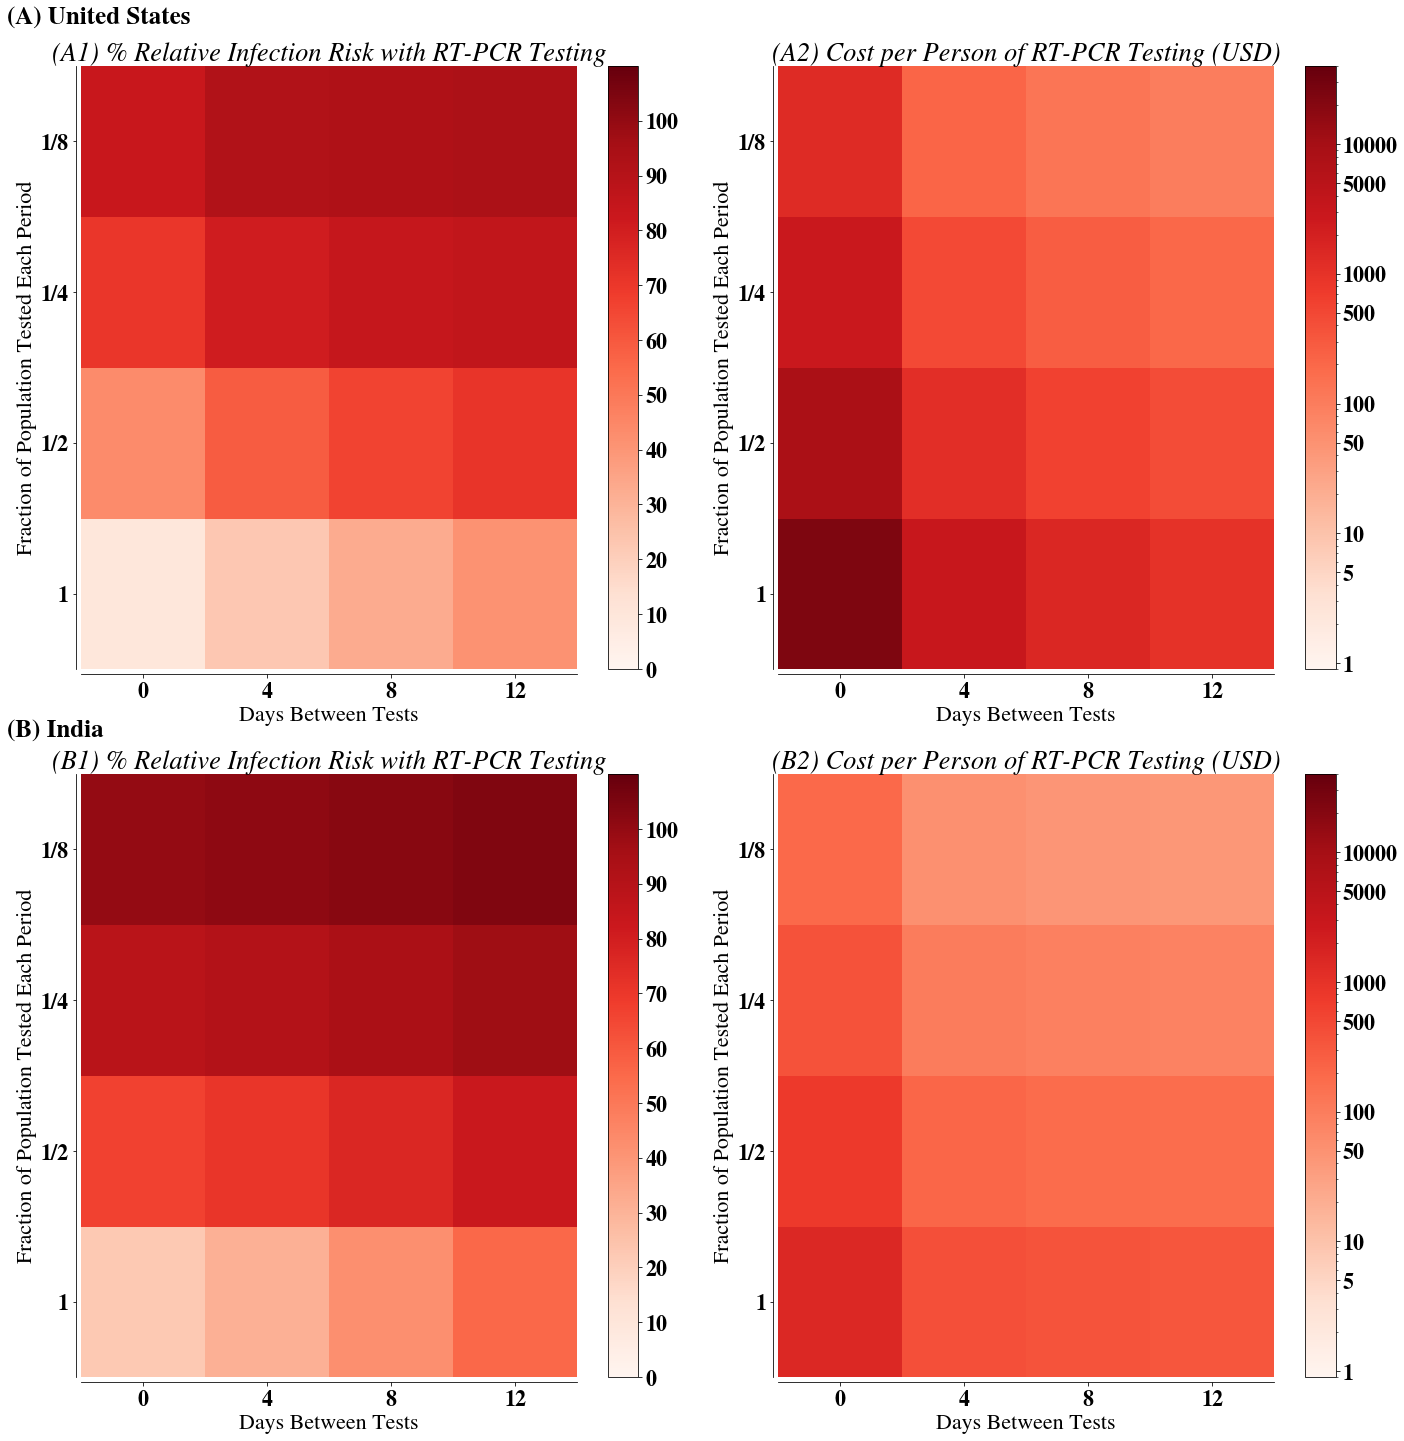

In [181]:
# US
fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(221)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

pcm = ax1.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
           np.percentile(total_cases_r_u[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax1.set_xticks([1.5, 2.5, 3.5, 4.5])
ax1.set_xticklabels(['0', '4', '8', '12'])

ax1.set_yticks([1.5, 2.5, 3.5, 4.5])
ax1.set_yticklabels(['1', '1/2', '1/4', '1/8'])
fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax1,
            format = '%1.0f')
ax1.set_xlabel('Days Between Tests')
ax1.set_ylabel('Fraction of Population Tested Each Period');

ax1.set_title('(A1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

# ax2 = fig.add_subplot(422)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax2.get_xaxis().tick_bottom()
# ax2.get_yaxis().tick_left()
# ax2.tick_params(axis = 'x', direction = 'out')
# ax2.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax2.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax2.set_axisbelow(True)


# pcm = ax2.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
#            np.percentile(total_cases_a_u[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50),
#            norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
#            cmap='Reds')
# ax2.set_xticks([1.5, 2.5, 3.5, 4.5])
# ax2.set_xticklabels(['0', '4', '8', '12'])

# ax2.set_yticks([1.5, 2.5, 3.5, 4.5])
# ax2.set_yticklabels(['1', '1/2', '1/4', '1/8'])

# fig.colorbar(pcm,
#              ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#             ax = ax2,
#             format = '%1.0f')
# ax2.set_xlabel('Days Between Tests')
# ax2.set_ylabel('Fraction of Population Tested Each Period');

# ax2.set_title('(A2) % Relative Infection Risk with Antigen Testing', style = 'italic');


ax3 = fig.add_subplot(222)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

pcm = ax3.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
           np.percentile(costs_r_u[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 40000),
           cmap='Reds')
ax3.set_xticks([1.5, 2.5, 3.5, 4.5])
ax3.set_xticklabels(['0', '4', '8', '12'])

ax3.set_yticks([1.5, 2.5, 3.5, 4.5])
ax3.set_yticklabels(['1', '1/2', '1/4', '1/8'])
fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax3,
            format = '%1.0f')
ax3.set_xlabel('Days Between Tests')
ax3.set_ylabel('Fraction of Population Tested Each Period');

ax3.set_title('(A2) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


# ax4 = fig.add_subplot(424)
# ax4.spines['top'].set_visible(False)
# ax4.spines['right'].set_visible(False)
# ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax4.get_xaxis().tick_bottom()
# ax4.get_yaxis().tick_left()
# ax4.tick_params(axis = 'x', direction = 'out')
# ax4.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax4.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax4.set_axisbelow(True)

# pcm = ax4.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
#            np.percentile(costs_a_u[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50) / 5000,
#            norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 40000),
#            cmap='Reds')
# ax4.set_xticks([1.5, 2.5, 3.5, 4.5])
# ax4.set_xticklabels(['0', '4', '8', '12'])

# ax4.set_yticks([1.5, 2.5, 3.5, 4.5])
# ax4.set_yticklabels(['1', '1/2', '1/4', '1/8'])

# fig.colorbar(pcm,
#              ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#             ax = ax4,
#             format = '%1.0f')
# ax4.set_xlabel('Days Between Tests')
# ax4.set_ylabel('Fraction of Population Tested Each Period');

# ax4.set_title('(A4) Cost per Person of Antigen Testing (USD)', style = 'italic');

# india

ax5 = fig.add_subplot(223)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
#ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

pcm = ax5.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
           np.percentile(total_cases_r_i[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax5.set_xticks([1.5, 2.5, 3.5, 4.5])
ax5.set_xticklabels(['0', '4', '8', '12'])

ax5.set_yticks([1.5, 2.5, 3.5, 4.5])
ax5.set_yticklabels(['1', '1/2', '1/4', '1/8'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax5,
            format = '%1.0f')
ax5.set_xlabel('Days Between Tests')
ax5.set_ylabel('Fraction of Population Tested Each Period');

ax5.set_title('(B1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

# ax6 = fig.add_subplot(426)
# ax6.spines['top'].set_visible(False)
# ax6.spines['right'].set_visible(False)
# ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax6.get_xaxis().tick_bottom()
# ax6.get_yaxis().tick_left()
# ax6.tick_params(axis = 'x', direction = 'out')
# ax6.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax6.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax6.set_axisbelow(True)


# pcm = ax6.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
#            np.percentile(total_cases_a_i[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50),
#            norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
#            cmap='Reds')
# ax6.set_xticks([1.5, 2.5, 3.5, 4.5])
# ax6.set_xticklabels(['0', '4', '8', '12'])

# ax6.set_yticks([1.5, 2.5, 3.5, 4.5])
# ax6.set_yticklabels(['1', '1/2', '1/4', '1/8'])

# fig.colorbar(pcm,
#              ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#             ax = ax6,
#             format = '%1.0f')
# ax6.set_xlabel('Days Between Tests')
# ax6.set_ylabel('Fraction of Population Tested Each Period');

# ax6.set_title('(B2) % Relative Infection Risk with Antigen Testing', style = 'italic');


ax7 = fig.add_subplot(224)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax7.get_xaxis().tick_bottom()
ax7.get_yaxis().tick_left()
ax7.tick_params(axis = 'x', direction = 'out')
ax7.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax7.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax7.set_axisbelow(True)

pcm = ax7.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
           np.percentile(costs_r_i[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 40000),
           cmap='Reds')
ax7.set_xticks([1.5, 2.5, 3.5, 4.5])
ax7.set_xticklabels(['0', '4', '8', '12'])

ax7.set_yticks([1.5, 2.5, 3.5, 4.5])
ax7.set_yticklabels(['1', '1/2', '1/4', '1/8'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax7,
            format = '%1.0f')
ax7.set_xlabel('Days Between Tests')
ax7.set_ylabel('Fraction of Population Tested Each Period');

ax7.set_title('(B2) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


# ax8 = fig.add_subplot(428)
# ax8.spines['top'].set_visible(False)
# ax8.spines['right'].set_visible(False)
# ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax8.get_xaxis().tick_bottom()
# ax8.get_yaxis().tick_left()
# ax8.tick_params(axis = 'x', direction = 'out')
# ax8.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax8.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax8.set_axisbelow(True)

# pcm = ax8.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
#            np.percentile(costs_a_i[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50) / 5000,
#            norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 40000),
#            cmap='Reds')
# ax8.set_xticks([1.5, 2.5, 3.5, 4.5])
# ax8.set_xticklabels(['0', '4', '8', '12'])
# ax8.set_yticks([1.5, 2.5, 3.5, 4.5])
# ax8.set_yticklabels(['1', '1/2', '1/4', '1/8'])

# fig.colorbar(pcm,
#              ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#             ax = ax8,
#             format = '%1.0f')
# ax8.set_xlabel('Days Between Tests')
# ax8.set_ylabel('Fraction of Population Tested Each Period');

# ax8.set_title('(B4) Cost per Person of Antigen Testing (USD)', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');


fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'fig2A-grid-rt-pcr.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'fig2A-grid-rt-pcr.pdf'), dpi = 300, bbox_inches = 'tight')

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


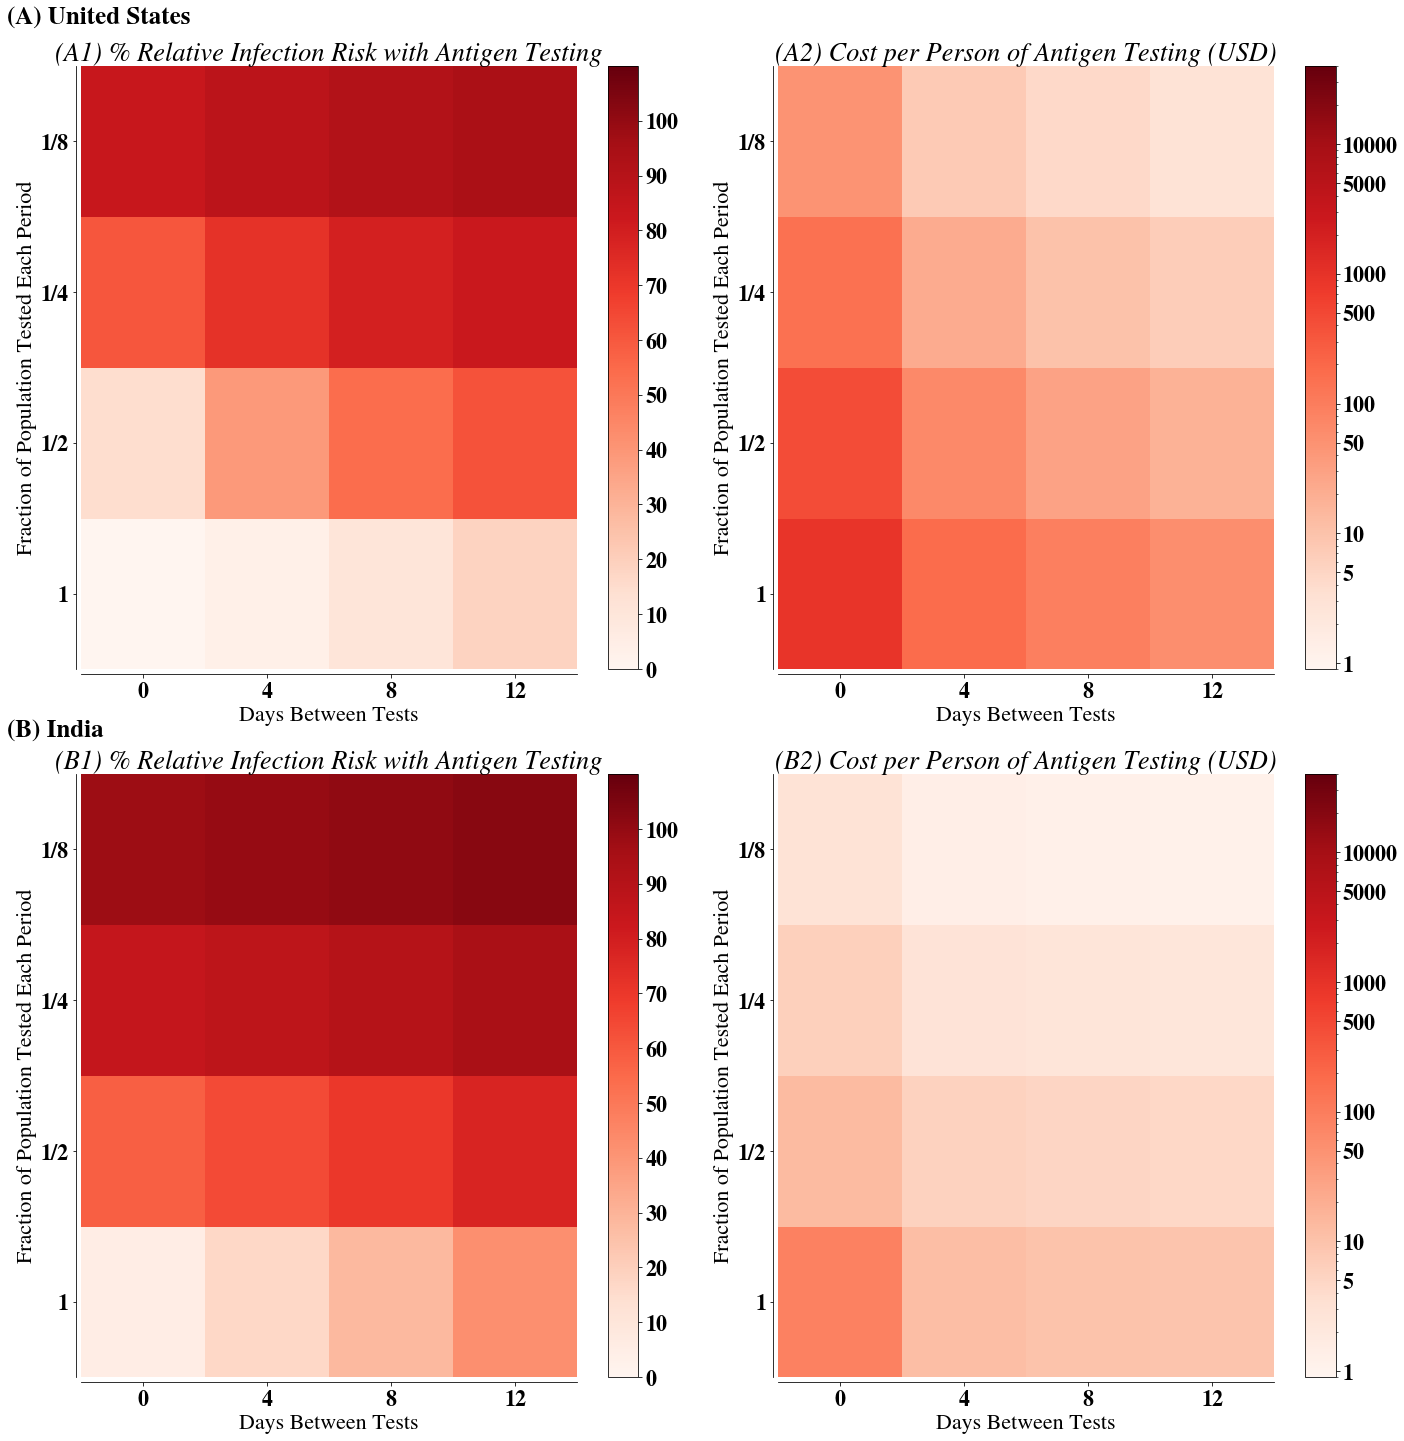

In [183]:
# US
fig = plt.figure(figsize = (20, 20))

# ax1 = fig.add_subplot(221)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# #ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax1.get_xaxis().tick_bottom()
# ax1.get_yaxis().tick_left()
# ax1.tick_params(axis = 'x', direction = 'out')
# ax1.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax1.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax1.set_axisbelow(True)

# pcm = ax1.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
#            np.percentile(total_cases_r_u[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50),
#            norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
#            cmap='Reds')
# ax1.set_xticks([1.5, 2.5, 3.5, 4.5])
# ax1.set_xticklabels(['0', '4', '8', '12'])

# ax1.set_yticks([1.5, 2.5, 3.5, 4.5])
# ax1.set_yticklabels(['1', '1/2', '1/4', '1/8'])
# fig.colorbar(pcm,
#              ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#             ax = ax1,
#             format = '%1.0f')
# ax1.set_xlabel('Days Between Tests')
# ax1.set_ylabel('Fraction of Population Tested Each Period');

# ax1.set_title('(A1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

ax2 = fig.add_subplot(221)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)


pcm = ax2.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
           np.percentile(total_cases_a_u[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax2.set_xticks([1.5, 2.5, 3.5, 4.5])
ax2.set_xticklabels(['0', '4', '8', '12'])

ax2.set_yticks([1.5, 2.5, 3.5, 4.5])
ax2.set_yticklabels(['1', '1/2', '1/4', '1/8'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax2,
            format = '%1.0f')
ax2.set_xlabel('Days Between Tests')
ax2.set_ylabel('Fraction of Population Tested Each Period');

ax2.set_title('(A1) % Relative Infection Risk with Antigen Testing', style = 'italic');


# ax3 = fig.add_subplot(222)
# ax3.spines['top'].set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax3.get_xaxis().tick_bottom()
# ax3.get_yaxis().tick_left()
# ax3.tick_params(axis = 'x', direction = 'out')
# ax3.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax3.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax3.set_axisbelow(True)

# pcm = ax3.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
#            np.percentile(costs_r_u[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50) / 5000,
#            norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 40000),
#            cmap='Reds')
# ax3.set_xticks([1.5, 2.5, 3.5, 4.5])
# ax3.set_xticklabels(['0', '4', '8', '12'])

# ax3.set_yticks([1.5, 2.5, 3.5, 4.5])
# ax3.set_yticklabels(['1', '1/2', '1/4', '1/8'])
# fig.colorbar(pcm,
#              ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#             ax = ax3,
#             format = '%1.0f')
# ax3.set_xlabel('Days Between Tests')
# ax3.set_ylabel('Fraction of Population Tested Each Period');

# ax3.set_title('(A2) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


ax4 = fig.add_subplot(222)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

pcm = ax4.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
           np.percentile(costs_a_u[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 40000),
           cmap='Reds')
ax4.set_xticks([1.5, 2.5, 3.5, 4.5])
ax4.set_xticklabels(['0', '4', '8', '12'])

ax4.set_yticks([1.5, 2.5, 3.5, 4.5])
ax4.set_yticklabels(['1', '1/2', '1/4', '1/8'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax4,
            format = '%1.0f')
ax4.set_xlabel('Days Between Tests')
ax4.set_ylabel('Fraction of Population Tested Each Period');

ax4.set_title('(A2) Cost per Person of Antigen Testing (USD)', style = 'italic');

# india

# ax5 = fig.add_subplot(223)
# ax5.spines['top'].set_visible(False)
# ax5.spines['right'].set_visible(False)
# #ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax5.get_xaxis().tick_bottom()
# ax5.get_yaxis().tick_left()
# ax5.tick_params(axis = 'x', direction = 'out')
# ax5.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax5.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax5.set_axisbelow(True)

# pcm = ax5.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
#            np.percentile(total_cases_r_i[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50),
#            norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
#            cmap='Reds')
# ax5.set_xticks([1.5, 2.5, 3.5, 4.5])
# ax5.set_xticklabels(['0', '4', '8', '12'])

# ax5.set_yticks([1.5, 2.5, 3.5, 4.5])
# ax5.set_yticklabels(['1', '1/2', '1/4', '1/8'])

# fig.colorbar(pcm,
#              ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#             ax = ax5,
#             format = '%1.0f')
# ax5.set_xlabel('Days Between Tests')
# ax5.set_ylabel('Fraction of Population Tested Each Period');

# ax5.set_title('(B1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

ax6 = fig.add_subplot(223)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)


pcm = ax6.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
           np.percentile(total_cases_a_i[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax6.set_xticks([1.5, 2.5, 3.5, 4.5])
ax6.set_xticklabels(['0', '4', '8', '12'])

ax6.set_yticks([1.5, 2.5, 3.5, 4.5])
ax6.set_yticklabels(['1', '1/2', '1/4', '1/8'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax6,
            format = '%1.0f')
ax6.set_xlabel('Days Between Tests')
ax6.set_ylabel('Fraction of Population Tested Each Period');

ax6.set_title('(B1) % Relative Infection Risk with Antigen Testing', style = 'italic');


# ax7 = fig.add_subplot(224)
# ax7.spines['top'].set_visible(False)
# ax7.spines['right'].set_visible(False)
# ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax7.get_xaxis().tick_bottom()
# ax7.get_yaxis().tick_left()
# ax7.tick_params(axis = 'x', direction = 'out')
# ax7.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax7.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax7.set_axisbelow(True)

# pcm = ax7.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
#            np.percentile(costs_r_i[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50) / 5000,
#            norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 40000),
#            cmap='Reds')
# ax7.set_xticks([1.5, 2.5, 3.5, 4.5])
# ax7.set_xticklabels(['0', '4', '8', '12'])

# ax7.set_yticks([1.5, 2.5, 3.5, 4.5])
# ax7.set_yticklabels(['1', '1/2', '1/4', '1/8'])

# fig.colorbar(pcm,
#              ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#             ax = ax7,
#             format = '%1.0f')
# ax7.set_xlabel('Days Between Tests')
# ax7.set_ylabel('Fraction of Population Tested Each Period');

# ax7.set_title('(B2) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


ax8 = fig.add_subplot(224)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax8.get_xaxis().tick_bottom()
ax8.get_yaxis().tick_left()
ax8.tick_params(axis = 'x', direction = 'out')
ax8.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax8.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax8.set_axisbelow(True)

pcm = ax8.pcolor([1, 2, 3, 4, 5], [1, 2, 3, 4, 5],
           np.percentile(costs_a_i[[0, 1, 3, 7], :, :][:, [0, 2, 4, 6], :], axis = 2, q = 50) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 40000),
           cmap='Reds')
ax8.set_xticks([1.5, 2.5, 3.5, 4.5])
ax8.set_xticklabels(['0', '4', '8', '12'])
ax8.set_yticks([1.5, 2.5, 3.5, 4.5])
ax8.set_yticklabels(['1', '1/2', '1/4', '1/8'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax8,
            format = '%1.0f')
ax8.set_xlabel('Days Between Tests')
ax8.set_ylabel('Fraction of Population Tested Each Period');

ax8.set_title('(B2) Cost per Person of Antigen Testing (USD)', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');


fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'fig2B-grid-antigen.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'fig2B-grid-antigen.pdf'), dpi = 300, bbox_inches = 'tight')

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


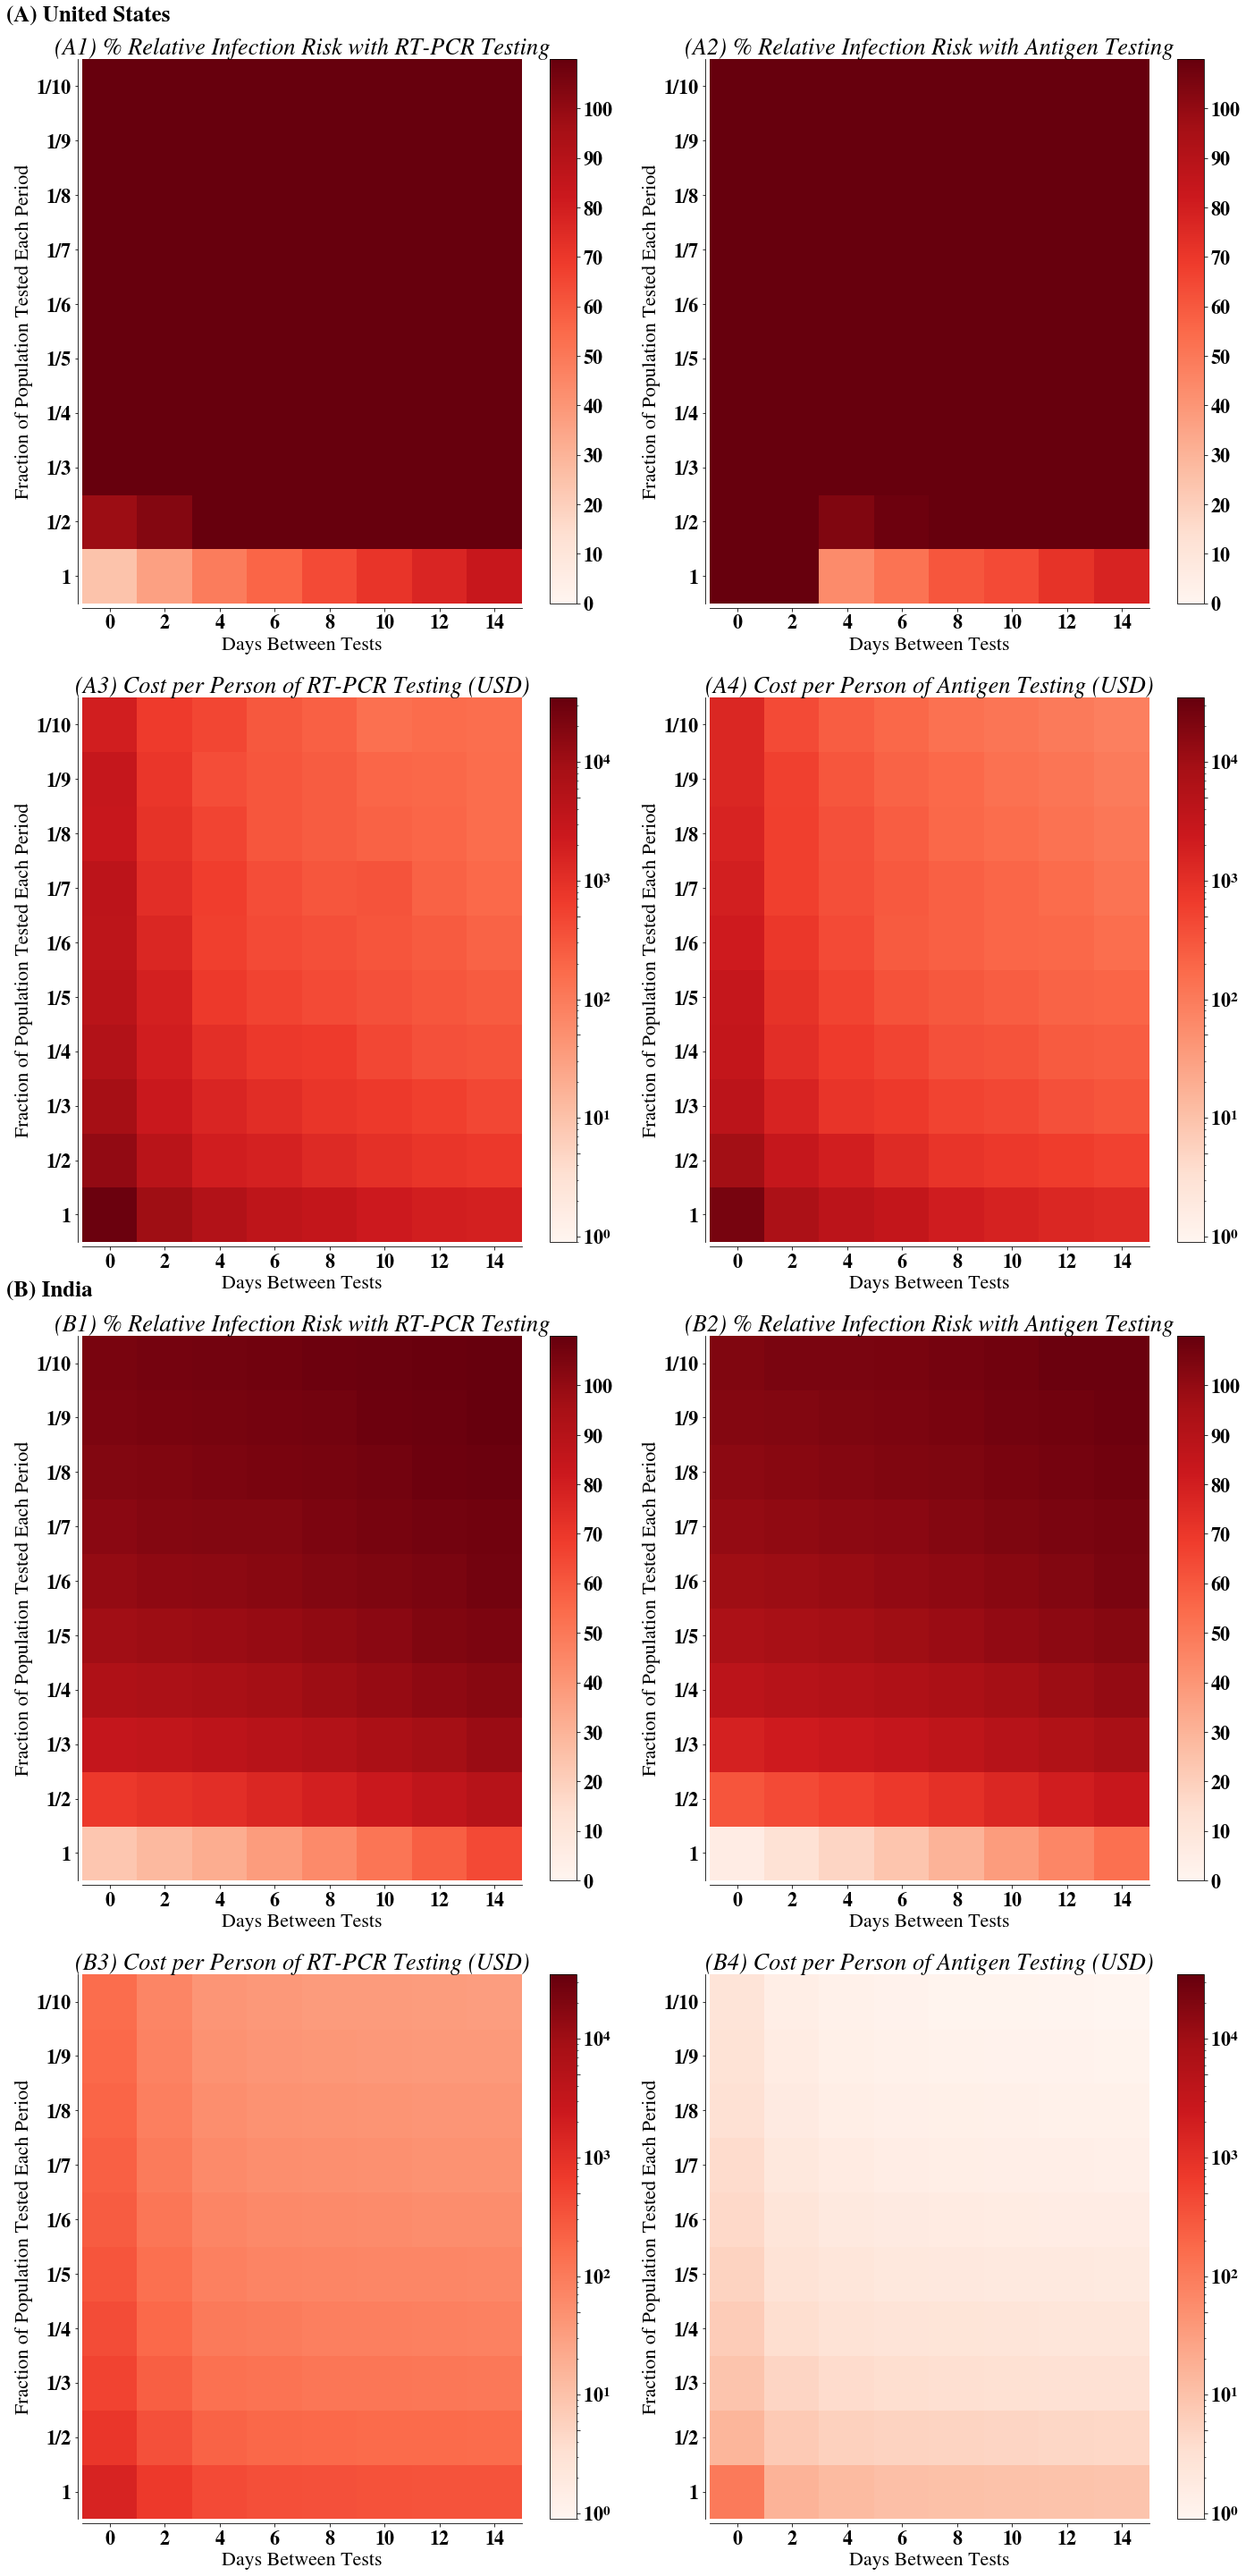

In [294]:
# US
fig = plt.figure(figsize = (20, 40))

ax1 = fig.add_subplot(421)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

pcm = ax1.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_r_u, axis = 2, q = 50),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax1.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax1.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax1.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax1.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax1)
ax1.set_xlabel('Days Between Tests')
ax1.set_ylabel('Fraction of Population Tested Each Period');

ax1.set_title('(A1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

ax2 = fig.add_subplot(422)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)


pcm = ax2.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_a_u, axis = 2, q = 50),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax2.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax2.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax2.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax2.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax2)
ax2.set_xlabel('Days Between Tests')
ax2.set_ylabel('Fraction of Population Tested Each Period');

ax2.set_title('(A2) % Relative Infection Risk with Antigen Testing', style = 'italic');


ax3 = fig.add_subplot(423)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

pcm = ax3.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_r_u, axis = 2, q = 50) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')
ax3.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax3.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax3.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax3.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax3)
ax3.set_xlabel('Days Between Tests')
ax3.set_ylabel('Fraction of Population Tested Each Period');

ax3.set_title('(A3) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


ax4 = fig.add_subplot(424)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

pcm = ax4.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_a_u, axis = 2, q = 50) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')

ax4.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax4.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax4.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax4.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax4)
ax4.set_xlabel('Days Between Tests')
ax4.set_ylabel('Fraction of Population Tested Each Period');

ax4.set_title('(A4) Cost per Person of Antigen Testing (USD)', style = 'italic');

# india

ax5 = fig.add_subplot(425)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
#ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

pcm = ax5.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_r_i, axis = 2, q = 50),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax5.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax5.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax5.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax5.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax5)
ax5.set_xlabel('Days Between Tests')
ax5.set_ylabel('Fraction of Population Tested Each Period');

ax5.set_title('(B1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

ax6 = fig.add_subplot(426)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)


pcm = ax6.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_a_i, axis = 2, q = 50),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax6.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax6.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax6.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax6.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax6)
ax6.set_xlabel('Days Between Tests')
ax6.set_ylabel('Fraction of Population Tested Each Period');

ax6.set_title('(B2) % Relative Infection Risk with Antigen Testing', style = 'italic');


ax7 = fig.add_subplot(427)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax7.get_xaxis().tick_bottom()
ax7.get_yaxis().tick_left()
ax7.tick_params(axis = 'x', direction = 'out')
ax7.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax7.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax7.set_axisbelow(True)

pcm = ax7.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_r_i, axis = 2, q =50) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')
ax7.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax7.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax7.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax7.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax7)
ax7.set_xlabel('Days Between Tests')
ax7.set_ylabel('Fraction of Population Tested Each Period');

ax7.set_title('(B3) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


ax8 = fig.add_subplot(428)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax8.get_xaxis().tick_bottom()
ax8.get_yaxis().tick_left()
ax8.tick_params(axis = 'x', direction = 'out')
ax8.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax8.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax8.set_axisbelow(True)

pcm = ax8.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_a_i, axis = 2, q = 50) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')

ax8.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax8.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax8.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax8.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax8)
ax8.set_xlabel('Days Between Tests')
ax8.set_ylabel('Fraction of Population Tested Each Period');

ax8.set_title('(B4) Cost per Person of Antigen Testing (USD)', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');


fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'figS5-grid-complete.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'figS5-grid-complete.pdf'), dpi = 300, bbox_inches = 'tight')

In [ ]:
# US
fig = plt.figure(figsize = (20, 40))

ax1 = fig.add_subplot(421)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

pcm = ax1.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_r_u, axis = 2, q = 97.5),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax1.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax1.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax1.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax1.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax1)
ax1.set_xlabel('Days Between Tests')
ax1.set_ylabel('Fraction of Population Tested Each Period');

ax1.set_title('(A1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

ax2 = fig.add_subplot(422)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)


pcm = ax2.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_a_u, axis = 2, q = 97.5),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax2.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax2.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax2.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax2.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax2)
ax2.set_xlabel('Days Between Tests')
ax2.set_ylabel('Fraction of Population Tested Each Period');

ax2.set_title('(A2) % Relative Infection Risk with Antigen Testing', style = 'italic');


ax3 = fig.add_subplot(423)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

pcm = ax3.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_r_u, axis = 2, q = 97.5) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')
ax3.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax3.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax3.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax3.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax3)
ax3.set_xlabel('Days Between Tests')
ax3.set_ylabel('Fraction of Population Tested Each Period');

ax3.set_title('(A3) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


ax4 = fig.add_subplot(424)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

pcm = ax4.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_a_u, axis = 2, q = 97.5) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')

ax4.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax4.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax4.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax4.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax4)
ax4.set_xlabel('Days Between Tests')
ax4.set_ylabel('Fraction of Population Tested Each Period');

ax4.set_title('(A4) Cost per Person of Antigen Testing (USD)', style = 'italic');

# india

ax5 = fig.add_subplot(425)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
#ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

pcm = ax5.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_r_i, axis = 2, q = 97.5),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax5.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax5.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax5.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax5.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax5)
ax5.set_xlabel('Days Between Tests')
ax5.set_ylabel('Fraction of Population Tested Each Period');

ax5.set_title('(B1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

ax6 = fig.add_subplot(426)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)


pcm = ax6.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_a_i, axis = 2, q = 97.5),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax6.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax6.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax6.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax6.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax6)
ax6.set_xlabel('Days Between Tests')
ax6.set_ylabel('Fraction of Population Tested Each Period');

ax6.set_title('(B2) % Relative Infection Risk with Antigen Testing', style = 'italic');


ax7 = fig.add_subplot(427)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax7.get_xaxis().tick_bottom()
ax7.get_yaxis().tick_left()
ax7.tick_params(axis = 'x', direction = 'out')
ax7.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax7.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax7.set_axisbelow(True)

pcm = ax7.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_r_i, axis = 2, q = 97.5) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')
ax7.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax7.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax7.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax7.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax7)
ax7.set_xlabel('Days Between Tests')
ax7.set_ylabel('Fraction of Population Tested Each Period');

ax7.set_title('(B3) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


ax8 = fig.add_subplot(428)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax8.get_xaxis().tick_bottom()
ax8.get_yaxis().tick_left()
ax8.tick_params(axis = 'x', direction = 'out')
ax8.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax8.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax8.set_axisbelow(True)

pcm = ax8.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_a_i, axis = 2, q = 97.5) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')

ax8.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax8.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax8.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax8.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax8)
ax8.set_xlabel('Days Between Tests')
ax8.set_ylabel('Fraction of Population Tested Each Period');

ax8.set_title('(B4) Cost per Person of Antigen Testing (USD)', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');


fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'figS6-grid-UB.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'figS6-grid-UB.pdf'), dpi = 300, bbox_inches = 'tight')

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


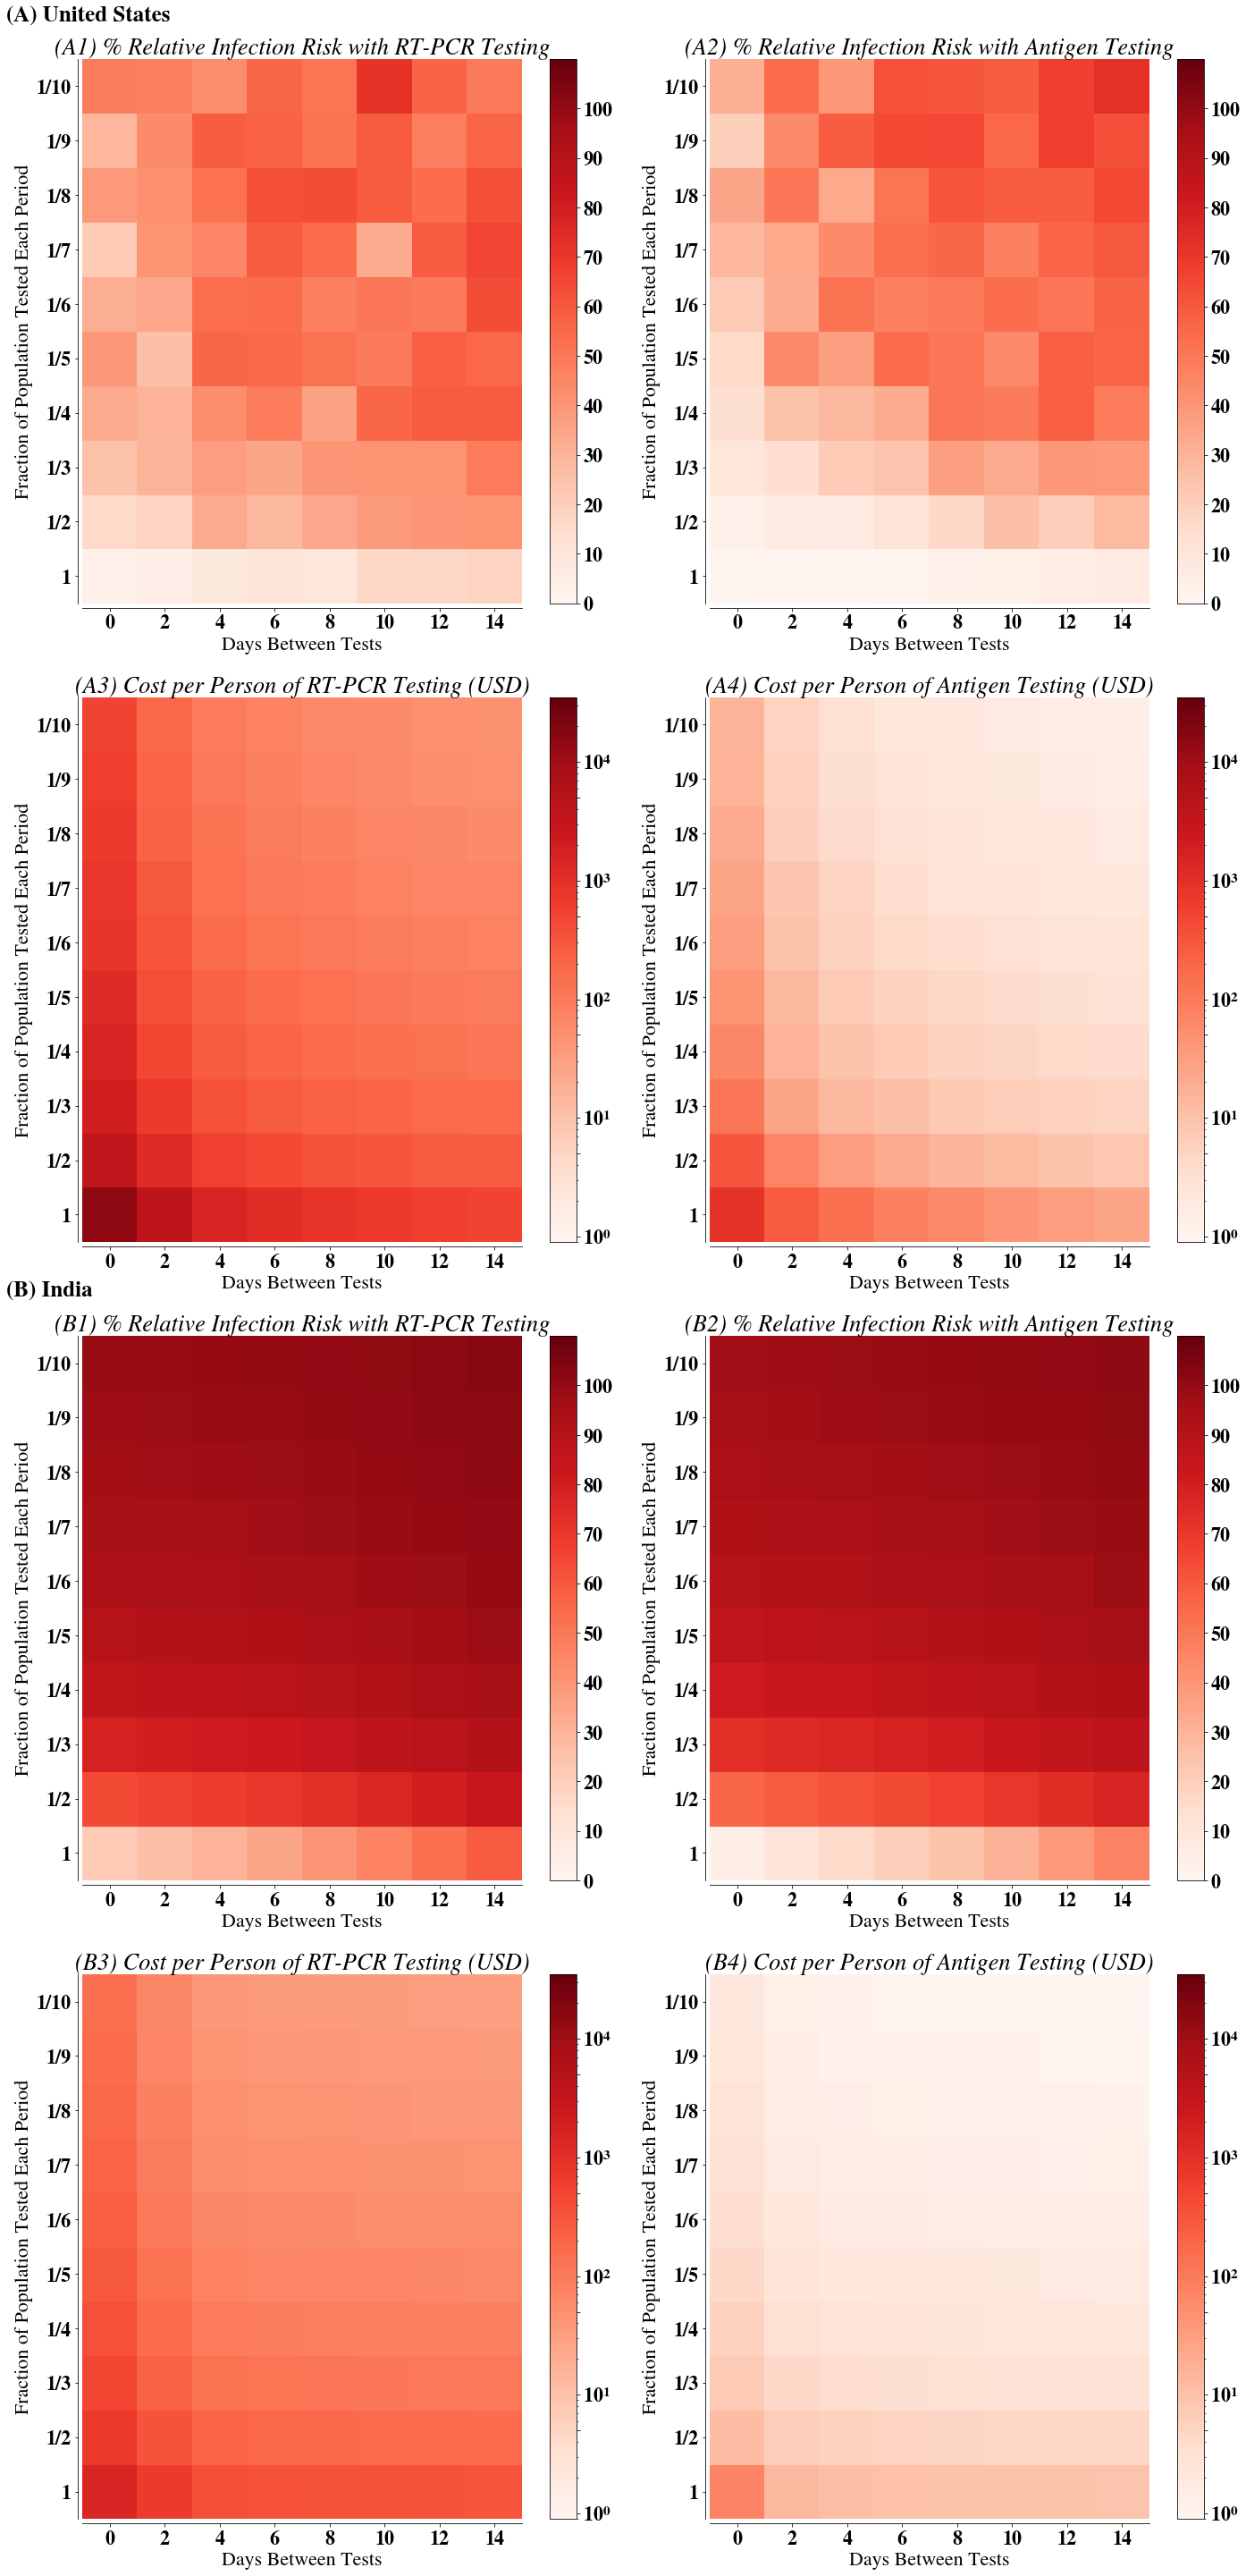

In [295]:
# US
fig = plt.figure(figsize = (20, 40))

ax1 = fig.add_subplot(421)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

pcm = ax1.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_r_u, axis = 2, q = 2.5),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax1.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax1.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax1.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax1.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax1)
ax1.set_xlabel('Days Between Tests')
ax1.set_ylabel('Fraction of Population Tested Each Period');

ax1.set_title('(A1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

ax2 = fig.add_subplot(422)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)


pcm = ax2.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_a_u, axis = 2, q = 2.5),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax2.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax2.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax2.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax2.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax2)
ax2.set_xlabel('Days Between Tests')
ax2.set_ylabel('Fraction of Population Tested Each Period');

ax2.set_title('(A2) % Relative Infection Risk with Antigen Testing', style = 'italic');


ax3 = fig.add_subplot(423)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

pcm = ax3.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_r_u, axis = 2, q = 2.5) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')
ax3.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax3.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax3.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax3.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax3)
ax3.set_xlabel('Days Between Tests')
ax3.set_ylabel('Fraction of Population Tested Each Period');

ax3.set_title('(A3) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


ax4 = fig.add_subplot(424)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

pcm = ax4.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_a_u, axis = 2, q = 2.5) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')

ax4.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax4.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax4.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax4.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax4)
ax4.set_xlabel('Days Between Tests')
ax4.set_ylabel('Fraction of Population Tested Each Period');

ax4.set_title('(A4) Cost per Person of Antigen Testing (USD)', style = 'italic');

# india

ax5 = fig.add_subplot(425)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
#ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

pcm = ax5.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_r_i, axis = 2, q = 2.5),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax5.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax5.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax5.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax5.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax5)
ax5.set_xlabel('Days Between Tests')
ax5.set_ylabel('Fraction of Population Tested Each Period');

ax5.set_title('(B1) % Relative Infection Risk with RT-PCR Testing', style = 'italic');

ax6 = fig.add_subplot(426)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)


pcm = ax6.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(total_cases_a_i, axis = 2, q = 2.5),
           norm = mpl.colors.Normalize(vmin = 0, vmax = 110),
           cmap='Reds')
ax6.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax6.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax6.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax6.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ax = ax6)
ax6.set_xlabel('Days Between Tests')
ax6.set_ylabel('Fraction of Population Tested Each Period');

ax6.set_title('(B2) % Relative Infection Risk with Antigen Testing', style = 'italic');


ax7 = fig.add_subplot(427)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax7.get_xaxis().tick_bottom()
ax7.get_yaxis().tick_left()
ax7.tick_params(axis = 'x', direction = 'out')
ax7.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax7.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax7.set_axisbelow(True)

pcm = ax7.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_r_i, axis = 2, q = 2.5) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')
ax7.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax7.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax7.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax7.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])
fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax7)
ax7.set_xlabel('Days Between Tests')
ax7.set_ylabel('Fraction of Population Tested Each Period');

ax7.set_title('(B3) Cost per Person of RT-PCR Testing (USD)', style = 'italic');


ax8 = fig.add_subplot(428)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax8.get_xaxis().tick_bottom()
ax8.get_yaxis().tick_left()
ax8.tick_params(axis = 'x', direction = 'out')
ax8.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax8.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax8.set_axisbelow(True)

pcm = ax8.pcolor([1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           np.percentile(costs_a_i, axis = 2, q = 2.5) / 5000,
           norm = mpl.colors.LogNorm(vmin = 0.9, vmax = 35000),
           cmap='Reds')

ax8.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax8.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

ax8.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
ax8.set_yticklabels(['1', '1/2', '1/3', '1/4', '1/5', '1/6', '1/7', '1/8',
                                                           '1/9', '1/10'])

fig.colorbar(pcm,
             ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
            ax = ax8)
ax8.set_xlabel('Days Between Tests')
ax8.set_ylabel('Fraction of Population Tested Each Period');

ax8.set_title('(B4) Cost per Person of Antigen Testing (USD)', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');


fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'figS7-grid-LB.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'figS7-grid-LB.pdf'), dpi = 300, bbox_inches = 'tight')

## Fig. 3: Antigen RT-PCR

In [18]:
replicates = 200
max_steps = 201
N_t = 5000

In [19]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigenRT-PCR.pickle'),
              'rb') as openfile:
        a_r_u = pickle.load(openfile)

In [20]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigenRT-PCR-India.pickle'),
              'rb') as openfile:
        a_r_i = pickle.load(openfile)

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


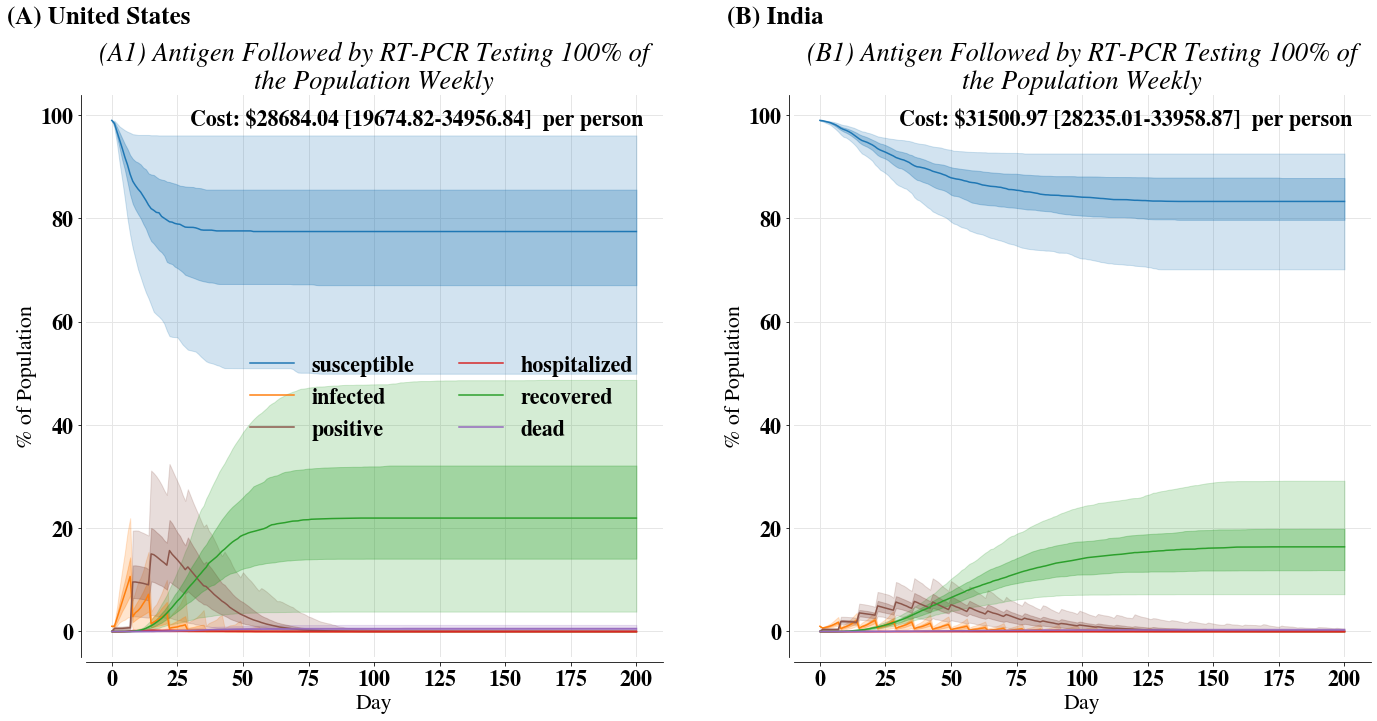

In [76]:
# US
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(121)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax1.plot(np.median(a_r_u[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax1.plot((np.median(a_r_u[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax1.plot(np.median(a_r_u[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax1.plot(np.median(a_r_u[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax1.plot(np.median(a_r_u[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax1.plot(np.median(a_r_u[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_r_u[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(a_r_u[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_r_u[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_r_u[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_r_u[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_r_u[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_r_u[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 25)[0],
                 np.percentile(a_r_u[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(a_r_u[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_r_u[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 25)[4],
                 np.percentile(a_r_u[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 25)[5],
                 np.percentile(a_r_u[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 25)[6],
                 np.percentile(a_r_u[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(a_r_u[0], axis = 0, q = 25)[7],
                 np.percentile(a_r_u[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax1.text(30, 98, 'Cost: $' + str(round(np.median(a_r_u[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_r_u[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_r_u[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax1.legend(loc = (.27, .37), ncol = 2, frameon = False);

ax1.set_xlabel('Day');
ax1.set_ylabel('% of Population');
ax1.set_title('(A1) Antigen Followed by RT-PCR Testing 100% of\nthe Population Weekly', style = 'italic');
ax1.set_xticks([0,25,50,75,100,125,150,175,200])

ax2 = fig.add_subplot(122)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax2.plot(np.median(a_r_i[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax2.plot((np.median(a_r_i[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax2.plot(np.median(a_r_i[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax2.plot(np.median(a_r_i[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax2.plot(np.median(a_r_i[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax2.plot(np.median(a_r_i[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_r_i[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(a_r_i[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_r_i[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_r_i[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_r_i[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_r_i[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_r_i[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 25)[0],
                 np.percentile(a_r_i[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(a_r_i[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_r_i[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 25)[4],
                 np.percentile(a_r_i[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 25)[5],
                 np.percentile(a_r_i[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 25)[6],
                 np.percentile(a_r_i[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(a_r_i[0], axis = 0, q = 25)[7],
                 np.percentile(a_r_i[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax2.text(30, 98, 'Cost: $' + str(round(np.median(a_r_i[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_r_i[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_r_i[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax2.set_xlabel('Day');
ax2.set_ylabel('% of Population');
ax2.set_title('(B1) Antigen Followed by RT-PCR Testing 100% of\nthe Population Weekly', style = 'italic');
ax2.set_xticks([0,25,50,75,100,125,150,175,200])

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.51, 1.00, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'fig3-antigenrt-pcr.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'fig3-antigenrt-pcr.pdf'), dpi = 300, bbox_inches = 'tight')

## Fig. 4: Initial Serological

In [21]:
replicates = 200
max_steps = 201
N_t = 5000

In [22]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-InitialSerologicalWeeklyWholePopAntigen.pickle'),
              'rb') as openfile:
        a_a_u = pickle.load(openfile)

In [23]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-InitialSerologicalWeeklyWholePopAntigen-India.pickle'),
              'rb') as openfile:
        a_a_i = pickle.load(openfile)

In [24]:
a_a_i[0].shape

(200, 8, 201)

In [30]:
100 - np.percentile(a_i_w[0][:, 0, -1], q = 50)

17.89

In [33]:
100 - np.percentile(a_a_i[0][:, 0, -1], q = 50)

22.159999999999997

In [40]:
np.percentile(90.7 - np.sort(a_a_i[0][:, 0, -1]) - 100 + np.sort(a_i_w[0][:, 0, -1]), q = 50)

-5.100000000000001

In [41]:
stats.median_test(100 - a_i_w[0][:, 0, -1], 100 - 9.3 - a_a_i[0][:, 0, -1])

(44.89,
 2.0841953975930385e-11,
 15.18,
 array([[134,  66],
        [ 66, 134]]))

In [26]:
tt3 = [np.where(a_a_i[0][i, 3, :] > .1)[0][-1] for i in range(200)]

In [27]:
np.percentile(tt3, q = 97.5)

196.0

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


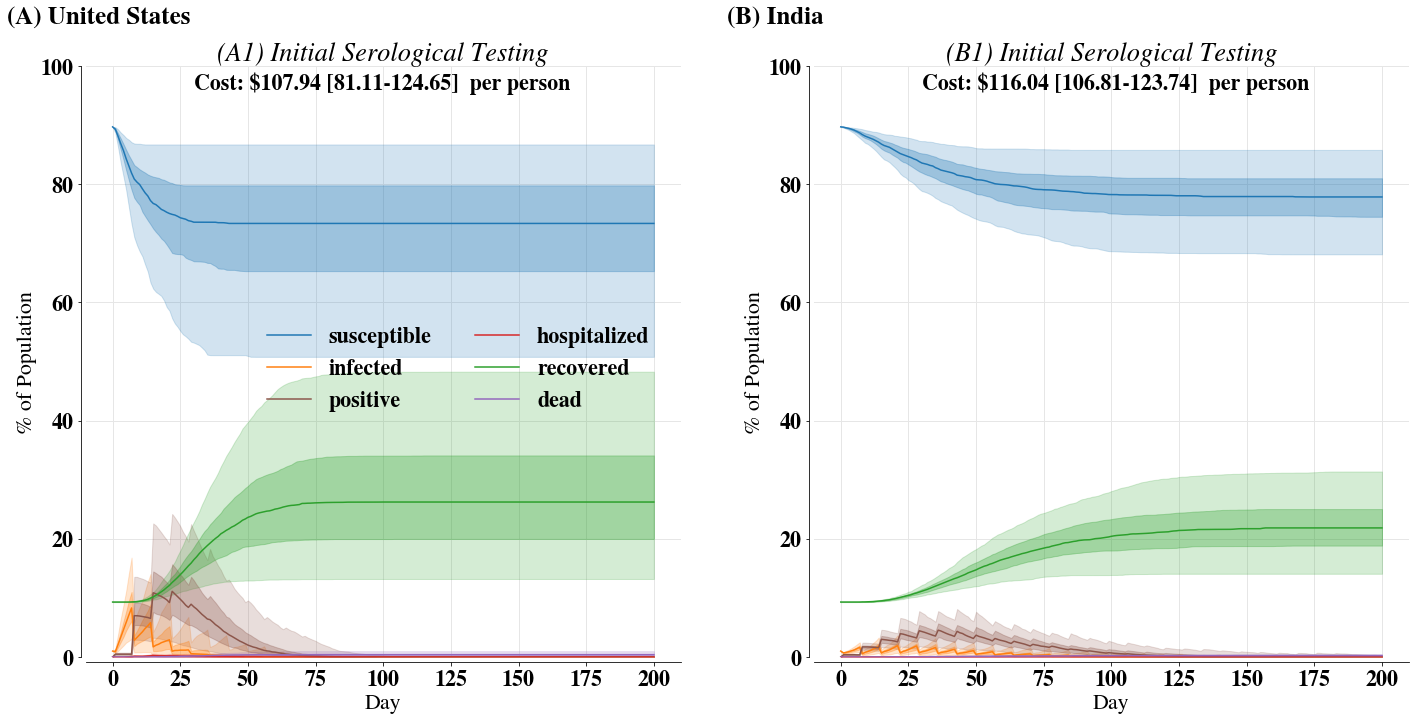

In [67]:
# US
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(121)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax1.plot(np.median(a_a_u[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax1.plot((np.median(a_a_u[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax1.plot(np.median(a_a_u[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax1.plot(np.median(a_a_u[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax1.plot(np.median(a_a_u[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax1.plot(np.median(a_a_u[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_a_u[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(a_a_u[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_a_u[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_a_u[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_a_u[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_a_u[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_a_u[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 25)[0],
                 np.percentile(a_a_u[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(a_a_u[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_a_u[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 25)[4],
                 np.percentile(a_a_u[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 25)[5],
                 np.percentile(a_a_u[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 25)[6],
                 np.percentile(a_a_u[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(a_a_u[0], axis = 0, q = 25)[7],
                 np.percentile(a_a_u[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax1.text(30, 96, 'Cost: $' + str(round(np.median(a_a_u[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_a_u[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_a_u[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax1.legend(loc = (.29, .4), ncol = 2, frameon = False);

ax1.set_xlabel('Day');
ax1.set_ylabel('% of Population');
ax1.set_title('(A1) Initial Serological Testing', style = 'italic');
ax1.set_ylim([0, 100]);


ax2 = fig.add_subplot(122)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax2.plot(np.median(a_a_i[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax2.plot((np.median(a_a_i[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax2.plot(np.median(a_a_i[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax2.plot(np.median(a_a_i[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax2.plot(np.median(a_a_i[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax2.plot(np.median(a_a_i[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_a_i[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(a_a_i[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_a_i[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_a_i[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_a_i[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_a_i[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_a_i[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 25)[0],
                 np.percentile(a_a_i[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(a_a_i[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_a_i[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 25)[4],
                 np.percentile(a_a_i[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 25)[5],
                 np.percentile(a_a_i[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 25)[6],
                 np.percentile(a_a_i[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(a_a_i[0], axis = 0, q = 25)[7],
                 np.percentile(a_a_i[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax2.text(30, 96, 'Cost: $' + str(round(np.median(a_a_i[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_a_i[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_a_i[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax2.set_xlabel('Day');
ax2.set_ylabel('% of Population');
ax2.set_title('(B1) Initial Serological Testing', style = 'italic');
ax2.set_ylim([0, 100]);

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.51, 1.00, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'fig4-initialserological.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'fig4-initialserological.pdf'), dpi = 300, bbox_inches = 'tight')

## Fig. S4: Impact of Time Delays

In [77]:
replicates = 200
max_steps = 201
N_t = 5000

In [78]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-1Day-.pickle'),
              'rb') as openfile:
        r_u_2 = pickle.load(openfile)

In [79]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-0Day-.pickle'),
              'rb') as openfile:
        r_u_1 = pickle.load(openfile)

In [80]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-Immediate.pickle'),
              'rb') as openfile:
        r_u_0 = pickle.load(openfile)

In [81]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-1Day-India.pickle'),
              'rb') as openfile:
        r_i_2 = pickle.load(openfile)

In [82]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-0Day-India.pickle'),
              'rb') as openfile:
        r_i_1 = pickle.load(openfile)

In [83]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-Immediate-India.pickle'),
              'rb') as openfile:
        r_i_0 = pickle.load(openfile)

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


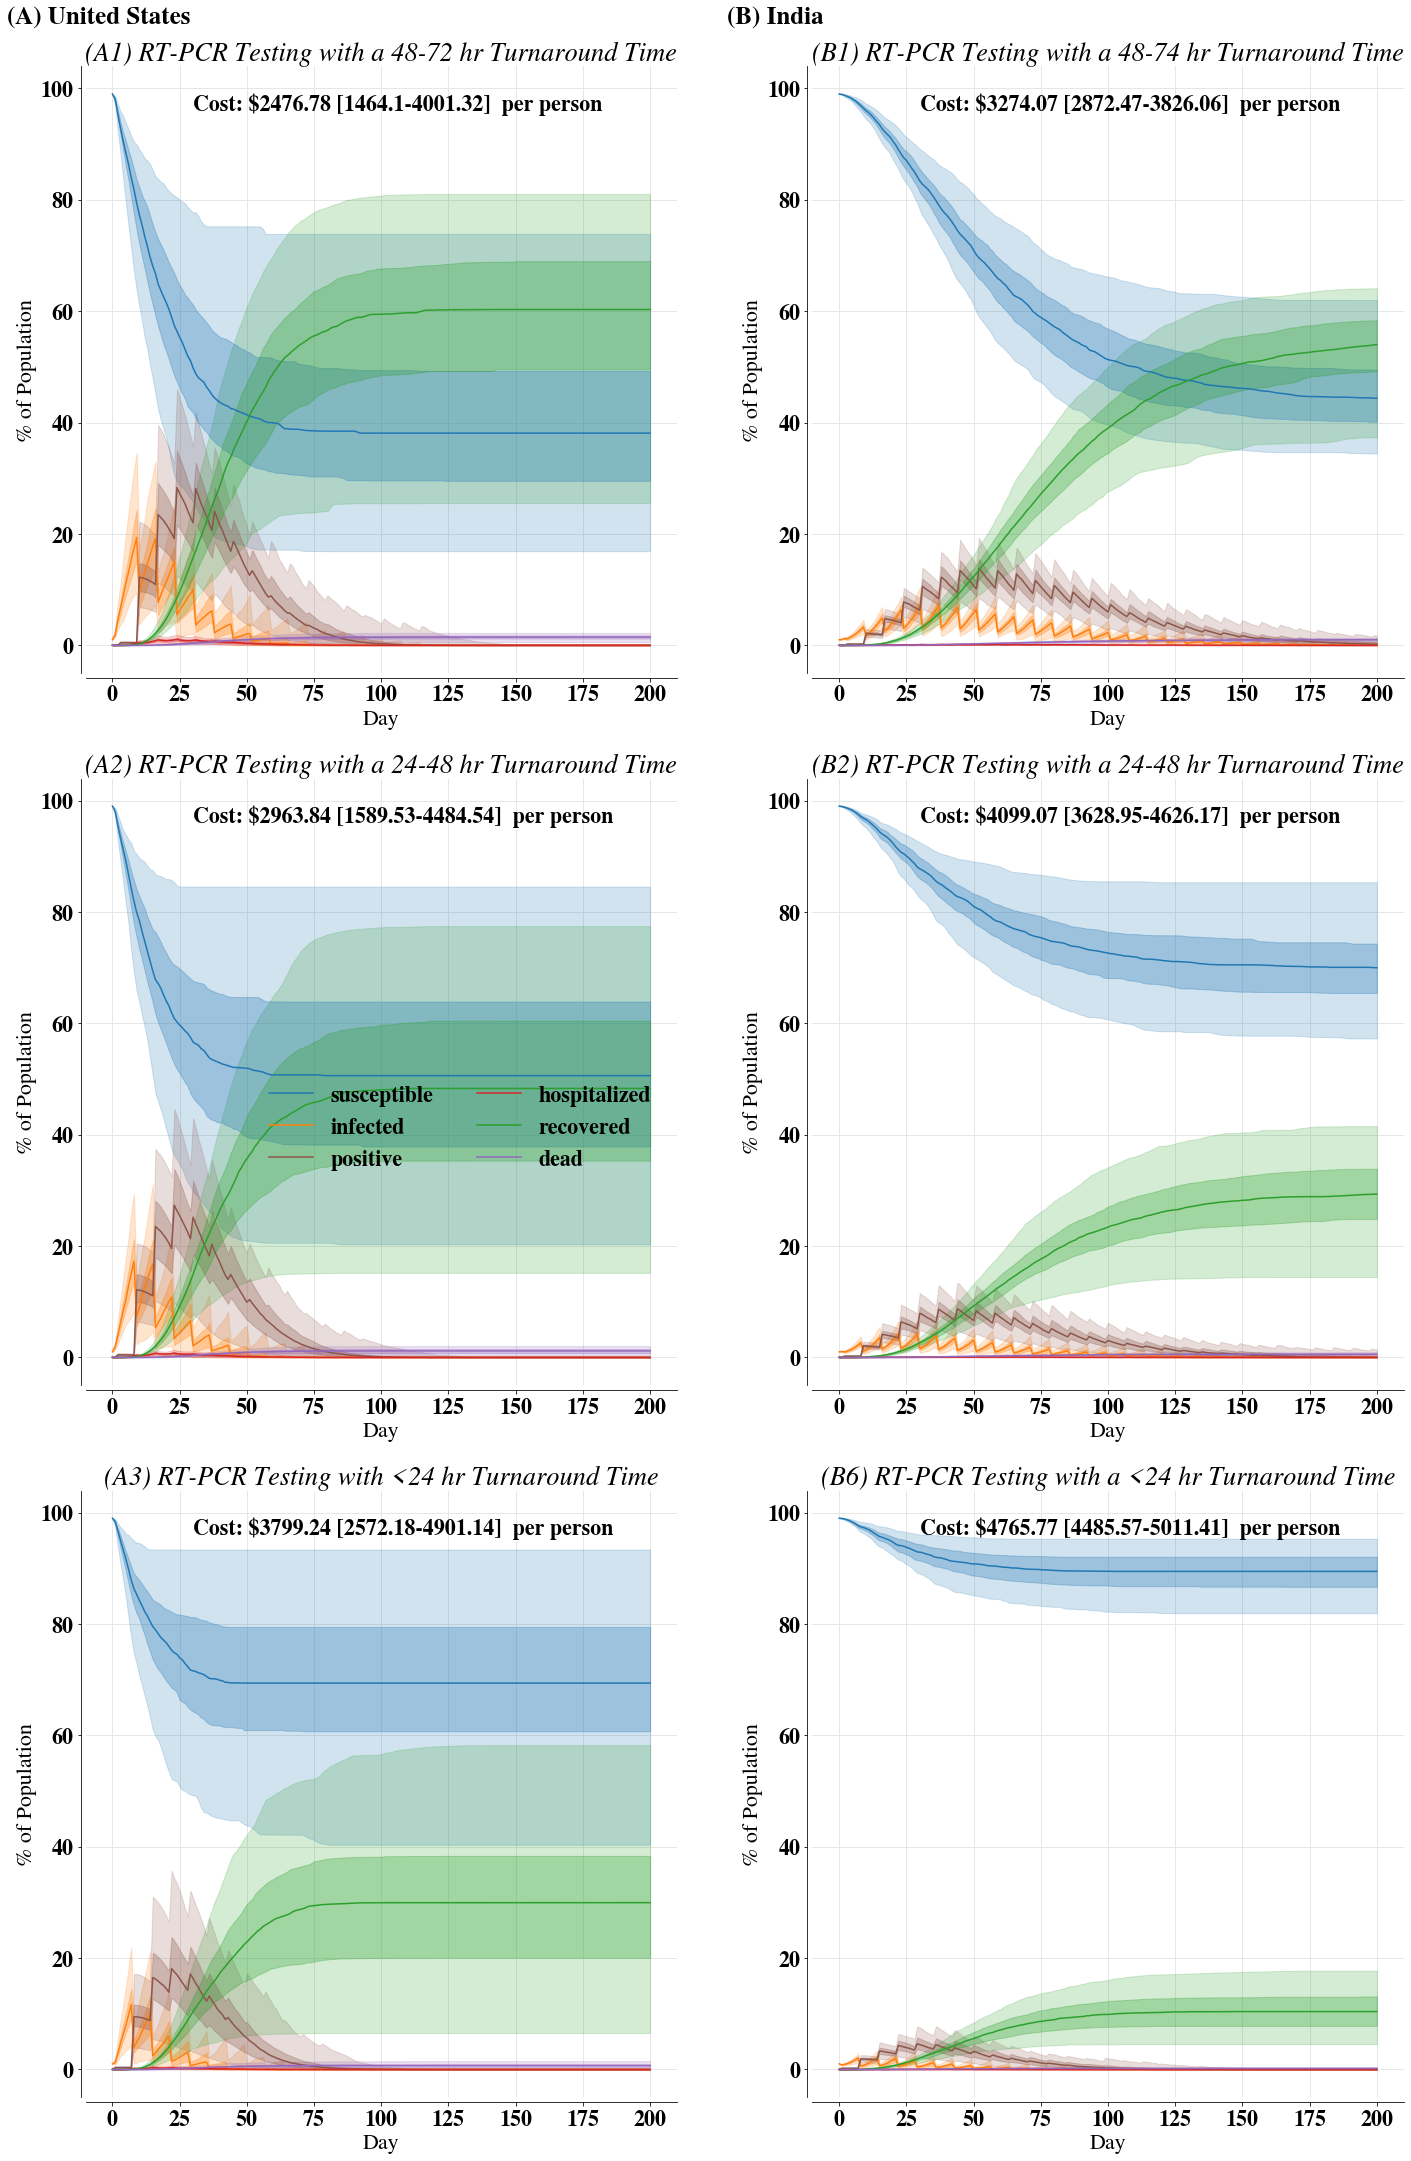

In [84]:
# US
fig = plt.figure(figsize = (20, 30))
ax1 = fig.add_subplot(321)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax1.plot(np.median(r_u_2[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax1.plot((np.median(r_u_2[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax1.plot(np.median(r_u_2[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax1.plot(np.median(r_u_2[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax1.plot(np.median(r_u_2[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax1.plot(np.median(r_u_2[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_2[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_2[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_2[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_2[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_2[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_2[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_2[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_2[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_2[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_2[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_2[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_2[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_2[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_2[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_2[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax1.text(30, 96, 'Cost: $' + str(round(np.median(r_u_2[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_2[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_2[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax1.set_xlabel('Day');
ax1.set_ylabel('% of Population');
ax1.set_title('(A1) RT-PCR Testing with a 48-72 hr Turnaround Time', style = 'italic');
ax1.set_xticks([0,25,50,75,100,125,150,175,200])

ax2 = fig.add_subplot(323)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax2.plot(np.median(r_u_1[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax2.plot((np.median(r_u_1[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax2.plot(np.median(r_u_1[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax2.plot(np.median(r_u_1[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax2.plot(np.median(r_u_1[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax2.plot(np.median(r_u_1[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_1[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_1[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_1[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_1[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_1[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_1[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_1[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_1[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_1[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_1[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_1[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_1[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_1[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_1[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_1[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax2.text(30, 96, 'Cost: $' + str(round(np.median(r_u_1[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_1[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_1[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax2.legend(loc = (.295, .34), ncol = 2, frameon = False);

ax2.set_xlabel('Day');
ax2.set_ylabel('% of Population');
ax2.set_title('(A2) RT-PCR Testing with a 24-48 hr Turnaround Time', style = 'italic');
ax2.set_xticks([0,25,50,75,100,125,150,175,200])

ax3 = fig.add_subplot(325)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax3.plot(np.median(r_u_0[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax3.plot((np.median(r_u_0[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax3.plot(np.median(r_u_0[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax3.plot(np.median(r_u_0[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax3.plot(np.median(r_u_0[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax3.plot(np.median(r_u_0[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_0[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(r_u_0[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_0[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_0[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_0[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_0[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_0[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_0[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(r_u_0[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_0[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_0[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_0[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_0[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(r_u_0[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_0[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax3.text(30, 96, 'Cost: $' + str(round(np.median(r_u_0[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_0[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_0[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax3.set_xlabel('Day');
ax3.set_ylabel('% of Population');
ax3.set_title('(A3) RT-PCR Testing with <24 hr Turnaround Time', style = 'italic');
ax3.set_xticks([0,25,50,75,100,125,150,175,200])

ax4 = fig.add_subplot(322)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax4.plot(np.median(r_i_2[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax4.plot((np.median(r_i_2[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax4.plot(np.median(r_i_2[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax4.plot(np.median(r_i_2[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax4.plot(np.median(r_i_2[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax4.plot(np.median(r_i_2[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_2[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(r_i_2[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_2[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_2[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_2[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_2[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_2[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_2[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(r_i_2[0], axis = 0, q = 25)[3]),
              (np.percentile(r_i_2[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_2[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_2[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_2[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(r_i_2[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_2[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax4.text(30, 96, 'Cost: $' + str(round(np.median(r_i_2[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_2[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_2[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax4.set_xlabel('Day');
ax4.set_ylabel('% of Population');
ax4.set_title('(B1) RT-PCR Testing with a 48-74 hr Turnaround Time', style = 'italic');
ax4.set_xticks([0,25,50,75,100,125,150,175,200])

ax5 = fig.add_subplot(324)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax5.plot(np.median(r_i_1[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax5.plot((np.median(r_i_1[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax5.plot(np.median(r_i_1[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax5.plot(np.median(r_i_1[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax5.plot(np.median(r_i_1[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax5.plot(np.median(r_i_1[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_1[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_1[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_1[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_1[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_1[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_1[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_1[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_1[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_1[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_1[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_1[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_1[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_1[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_1[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_1[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax5.text(30, 96, 'Cost: $' + str(round(np.median(r_i_1[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_1[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_1[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax5.set_xlabel('Day');
ax5.set_ylabel('% of Population');
ax5.set_title('(B2) RT-PCR Testing with a 24-48 hr Turnaround Time', style = 'italic');
ax5.set_xticks([0,25,50,75,100,125,150,175,200])

ax6 = fig.add_subplot(326)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax6.plot(np.median(r_i_0[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax6.plot((np.median(r_i_0[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax6.plot(np.median(r_i_0[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax6.plot(np.median(r_i_0[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax6.plot(np.median(r_i_0[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax6.plot(np.median(r_i_0[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_0[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_0[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_0[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_0[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_0[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_0[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_0[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_0[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_0[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_0[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_0[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_0[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_0[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_0[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_0[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax6.text(30, 96, 'Cost: $' + str(round(np.median(r_i_0[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_0[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_0[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax6.set_xlabel('Day');
ax6.set_ylabel('% of Population');
ax6.set_title('(B6) RT-PCR Testing with a <24 hr Turnaround Time', style = 'italic');
ax6.set_xticks([0,25,50,75,100,125,150,175,200])

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.51, 1.00, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'figS2-timedelays.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'figS2-timedelays.pdf'), dpi = 300, bbox_inches = 'tight')

## Fig. S5: Changes in R$_0$

### R$_0$ = 2.0

In [267]:
replicates = 200
max_steps = 201
N_t = 5000

In [268]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-R0=2.pickle'),
              'rb') as openfile:
        r_u_w = pickle.load(openfile)

In [269]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopRT-PCR-R0=2.pickle'),
              'rb') as openfile:
        r_u_t = pickle.load(openfile)

In [270]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-R0=2.pickle'),
              'rb') as openfile:
        a_u_w = pickle.load(openfile)

In [271]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-R0=2.pickle'),
              'rb') as openfile:
        a_u_t = pickle.load(openfile)

In [272]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-R0=2-India.pickle'),
              'rb') as openfile:
        r_i_w = pickle.load(openfile)

In [273]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopRT-PCR-R0=2-India.pickle'),
              'rb') as openfile:
        r_i_t = pickle.load(openfile)

In [274]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-R0=2-India.pickle'),
              'rb') as openfile:
        a_i_w = pickle.load(openfile)

In [275]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-R0=2-India.pickle'),
              'rb') as openfile:
        a_i_t = pickle.load(openfile)

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


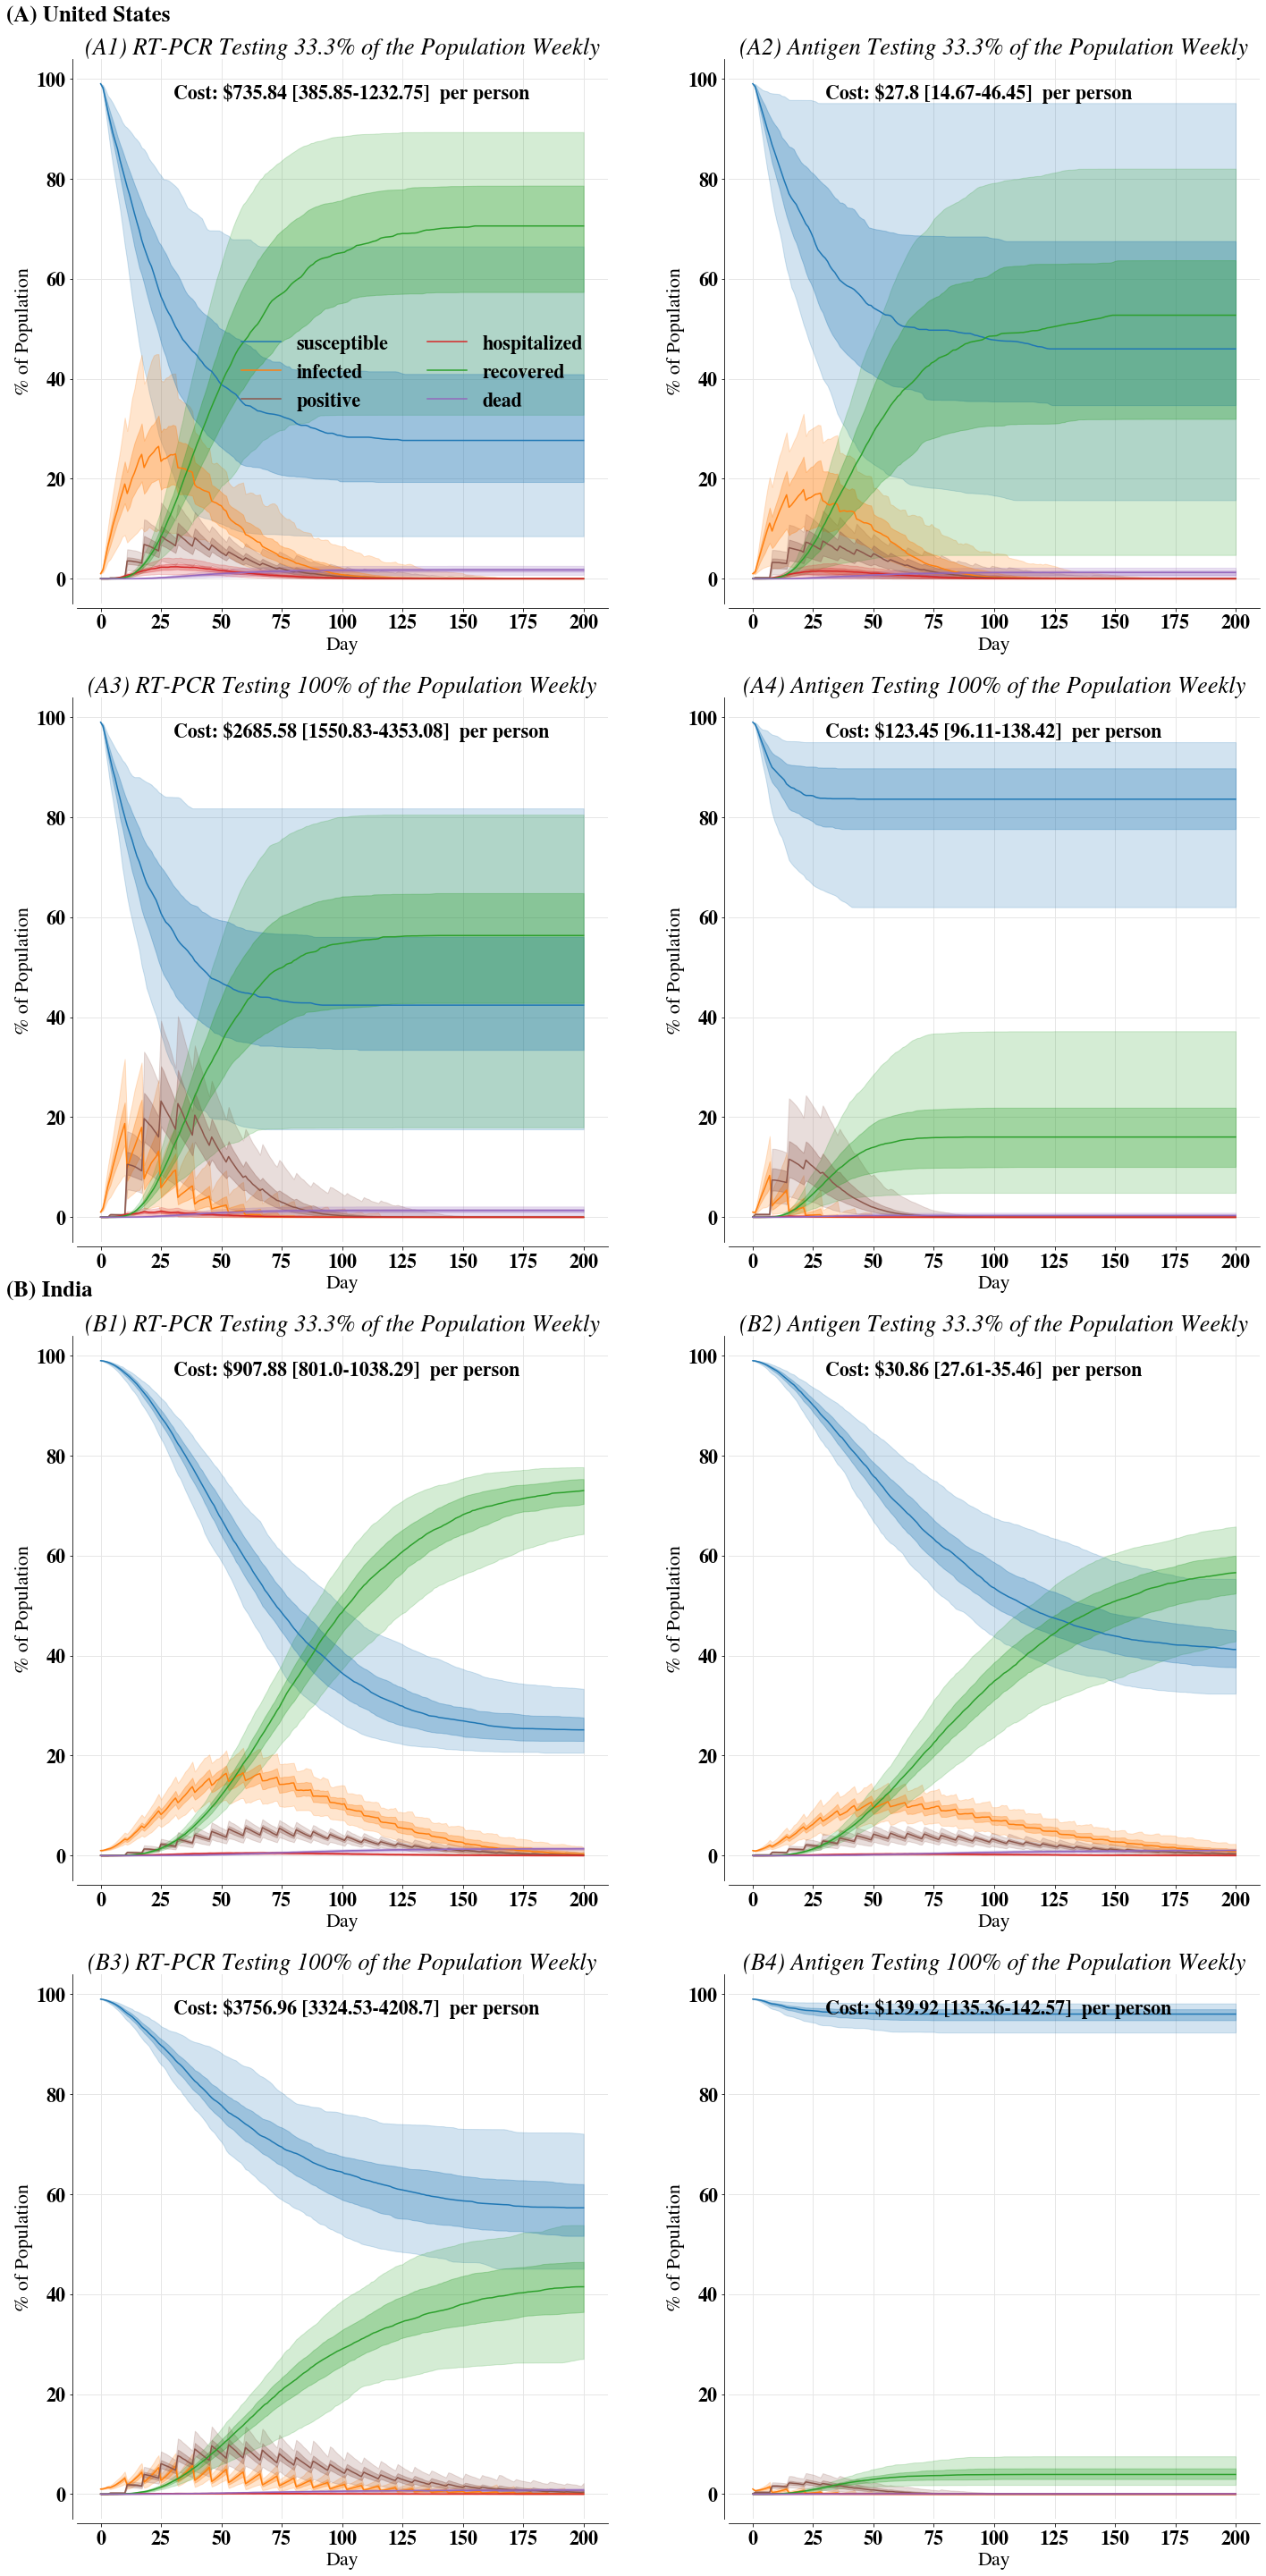

In [276]:
# US
fig = plt.figure(figsize = (20, 40))
ax1 = fig.add_subplot(423)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax1.plot(np.median(r_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax1.plot((np.median(r_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax1.plot(np.median(r_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax1.plot(np.median(r_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax1.plot(np.median(r_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax1.plot(np.median(r_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax1.text(30, 96, 'Cost: $' + str(round(np.median(r_u_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax1.set_xlabel('Day');
ax1.set_ylabel('% of Population');
ax1.set_title('(A3) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

ax2 = fig.add_subplot(421)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax2.plot(np.median(r_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax2.plot((np.median(r_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax2.plot(np.median(r_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax2.plot(np.median(r_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax2.plot(np.median(r_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax2.plot(np.median(r_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax2.text(30, 96, 'Cost: $' + str(round(np.median(r_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax2.legend(loc = (.295, .34), ncol = 2, frameon = False);

ax2.set_xlabel('Day');
ax2.set_ylabel('% of Population');
ax2.set_title('(A1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



ax3 = fig.add_subplot(424)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax3.plot(np.median(a_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax3.plot((np.median(a_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax3.plot(np.median(a_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax3.plot(np.median(a_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax3.plot(np.median(a_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax3.plot(np.median(a_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[0],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[4],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[5],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[6],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[7],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax3.text(30, 96, 'Cost: $' + str(round(np.median(a_u_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax3.set_xlabel('Day');
ax3.set_ylabel('% of Population');
ax3.set_title('(A4) Antigen Testing 100% of the Population Weekly', style = 'italic');


ax4 = fig.add_subplot(422)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax4.plot(np.median(a_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax4.plot((np.median(a_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax4.plot(np.median(a_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax4.plot(np.median(a_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax4.plot(np.median(a_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax4.plot(np.median(a_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[0],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 25)[3]),
              (np.percentile(a_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[4],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[5],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[6],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[7],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax4.text(30, 96, 'Cost: $' + str(round(np.median(a_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax4.set_xlabel('Day');
ax4.set_ylabel('% of Population');
ax4.set_title('(A2) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

# india

ax5 = fig.add_subplot(427)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax5.plot(np.median(r_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax5.plot((np.median(r_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax5.plot(np.median(r_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax5.plot(np.median(r_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax5.plot(np.median(r_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax5.plot(np.median(r_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax5.text(30, 96, 'Cost: $' + str(round(np.median(r_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax5.set_xlabel('Day');
ax5.set_ylabel('% of Population');
ax5.set_title('(B3) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

ax6 = fig.add_subplot(425)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax6.plot(np.median(r_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax6.plot((np.median(r_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax6.plot(np.median(r_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax6.plot(np.median(r_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax6.plot(np.median(r_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax6.plot(np.median(r_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax6.text(30, 96, 'Cost: $' + str(round(np.median(r_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax6.set_xlabel('Day');
ax6.set_ylabel('% of Population');
ax6.set_title('(B1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



ax7 = fig.add_subplot(428)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax7.get_xaxis().tick_bottom()
ax7.get_yaxis().tick_left()
ax7.tick_params(axis = 'x', direction = 'out')
ax7.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax7.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax7.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax7.plot(np.median(a_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax7.plot((np.median(a_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax7.plot(np.median(a_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax7.plot(np.median(a_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax7.plot(np.median(a_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax7.plot(np.median(a_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[0],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[4],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[5],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[6],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[7],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax7.text(30, 96, 'Cost: $' + str(round(np.median(a_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax7.set_xlabel('Day');
ax7.set_ylabel('% of Population');
ax7.set_title('(B4) Antigen Testing 100% of the Population Weekly', style = 'italic');


ax8 = fig.add_subplot(426)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax8.get_xaxis().tick_bottom()
ax8.get_yaxis().tick_left()
ax8.tick_params(axis = 'x', direction = 'out')
ax8.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax8.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax8.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax8.plot(np.median(a_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax8.plot((np.median(a_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax8.plot(np.median(a_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax8.plot(np.median(a_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax8.plot(np.median(a_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax8.plot(np.median(a_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[0],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 25)[3]),
              (np.percentile(a_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[4],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[5],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[6],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[7],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax8.text(30, 96, 'Cost: $' + str(round(np.median(a_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax8.set_xlabel('Day');
ax8.set_ylabel('% of Population');
ax8.set_title('(B2) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

fig.tight_layout();

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.savefig(os.path.join(fig_dir, 'figS3-R0=2.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'figS3-R0=2.pdf'), dpi = 300, bbox_inches = 'tight')

### R$_0$ = 1.5

In [257]:
replicates = 200
max_steps = 201
N_t = 5000

In [258]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-R0=1.5.pickle'),
              'rb') as openfile:
        r_u_w = pickle.load(openfile)

In [259]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopRT-PCR-R0=1.5.pickle'),
              'rb') as openfile:
        r_u_t = pickle.load(openfile)

In [260]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-R0=1.5.pickle'),
              'rb') as openfile:
        a_u_w = pickle.load(openfile)

In [261]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-R0=1.5.pickle'),
              'rb') as openfile:
        a_u_t = pickle.load(openfile)

In [262]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopRT-PCR-R0=1.5-India.pickle'),
              'rb') as openfile:
        r_i_w = pickle.load(openfile)

In [263]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopRT-PCR-R0=1.5-India.pickle'),
              'rb') as openfile:
        r_i_t = pickle.load(openfile)

In [264]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-R0=1.5-India.pickle'),
              'rb') as openfile:
        a_i_w = pickle.load(openfile)

In [265]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-R0=1.5-India.pickle'),
              'rb') as openfile:
        a_i_t = pickle.load(openfile)

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


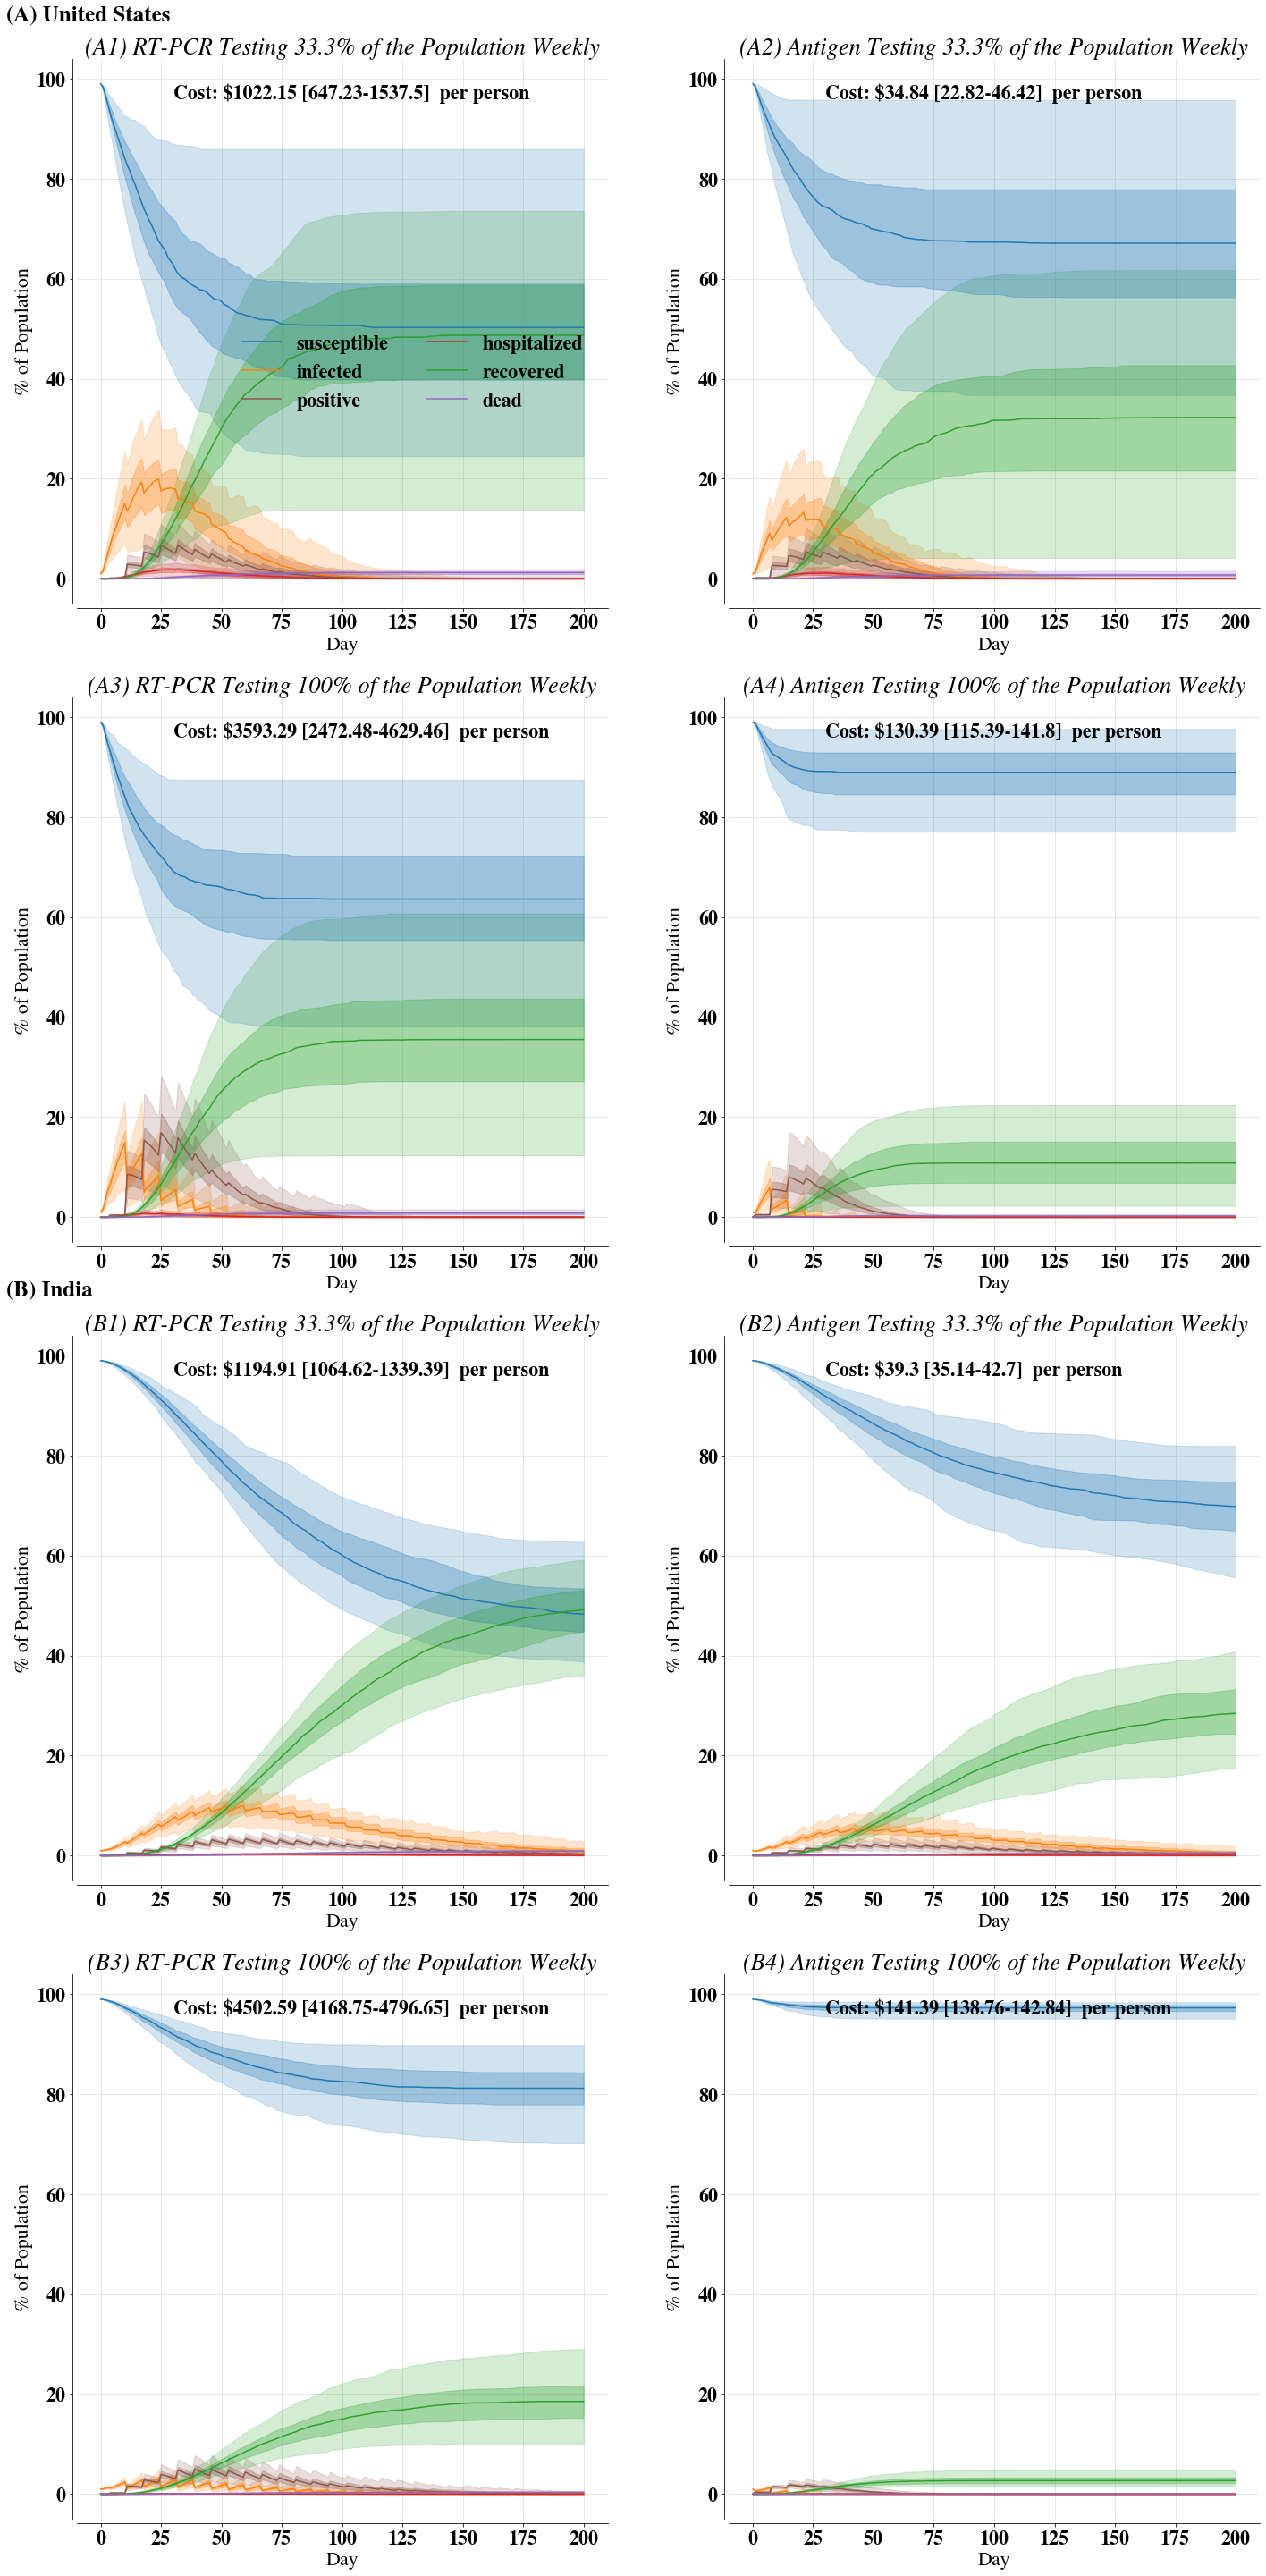

In [266]:
# US
fig = plt.figure(figsize = (20, 40))
ax1 = fig.add_subplot(423)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax1.plot(np.median(r_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax1.plot((np.median(r_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax1.plot(np.median(r_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax1.plot(np.median(r_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax1.plot(np.median(r_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax1.plot(np.median(r_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax1.text(30, 96, 'Cost: $' + str(round(np.median(r_u_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax1.set_xlabel('Day');
ax1.set_ylabel('% of Population');
ax1.set_title('(A3) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

ax2 = fig.add_subplot(421)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax2.plot(np.median(r_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax2.plot((np.median(r_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax2.plot(np.median(r_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax2.plot(np.median(r_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax2.plot(np.median(r_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax2.plot(np.median(r_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax2.text(30, 96, 'Cost: $' + str(round(np.median(r_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax2.legend(loc = (.295, .34), ncol = 2, frameon = False);

ax2.set_xlabel('Day');
ax2.set_ylabel('% of Population');
ax2.set_title('(A1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



ax3 = fig.add_subplot(424)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax3.plot(np.median(a_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax3.plot((np.median(a_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax3.plot(np.median(a_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax3.plot(np.median(a_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax3.plot(np.median(a_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax3.plot(np.median(a_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[0],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[4],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[5],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[6],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[7],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax3.text(30, 96, 'Cost: $' + str(round(np.median(a_u_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax3.set_xlabel('Day');
ax3.set_ylabel('% of Population');
ax3.set_title('(A4) Antigen Testing 100% of the Population Weekly', style = 'italic');


ax4 = fig.add_subplot(422)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax4.plot(np.median(a_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax4.plot((np.median(a_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax4.plot(np.median(a_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax4.plot(np.median(a_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax4.plot(np.median(a_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax4.plot(np.median(a_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[0],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 25)[3]),
              (np.percentile(a_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[4],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[5],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[6],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[7],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax4.text(30, 96, 'Cost: $' + str(round(np.median(a_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax4.set_xlabel('Day');
ax4.set_ylabel('% of Population');
ax4.set_title('(A2) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

# india

ax5 = fig.add_subplot(427)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax5.plot(np.median(r_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax5.plot((np.median(r_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax5.plot(np.median(r_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax5.plot(np.median(r_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax5.plot(np.median(r_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax5.plot(np.median(r_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax5.text(30, 96, 'Cost: $' + str(round(np.median(r_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax5.set_xlabel('Day');
ax5.set_ylabel('% of Population');
ax5.set_title('(B3) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

ax6 = fig.add_subplot(425)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax6.plot(np.median(r_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax6.plot((np.median(r_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax6.plot(np.median(r_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax6.plot(np.median(r_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax6.plot(np.median(r_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax6.plot(np.median(r_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax6.text(30, 96, 'Cost: $' + str(round(np.median(r_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax6.set_xlabel('Day');
ax6.set_ylabel('% of Population');
ax6.set_title('(B1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



ax7 = fig.add_subplot(428)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax7.get_xaxis().tick_bottom()
ax7.get_yaxis().tick_left()
ax7.tick_params(axis = 'x', direction = 'out')
ax7.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax7.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax7.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax7.plot(np.median(a_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax7.plot((np.median(a_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax7.plot(np.median(a_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax7.plot(np.median(a_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax7.plot(np.median(a_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax7.plot(np.median(a_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[0],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[4],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[5],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[6],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[7],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax7.text(30, 96, 'Cost: $' + str(round(np.median(a_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax7.set_xlabel('Day');
ax7.set_ylabel('% of Population');
ax7.set_title('(B4) Antigen Testing 100% of the Population Weekly', style = 'italic');


ax8 = fig.add_subplot(426)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax8.get_xaxis().tick_bottom()
ax8.get_yaxis().tick_left()
ax8.tick_params(axis = 'x', direction = 'out')
ax8.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax8.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax8.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax8.plot(np.median(a_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax8.plot((np.median(a_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax8.plot(np.median(a_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax8.plot(np.median(a_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax8.plot(np.median(a_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax8.plot(np.median(a_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[0],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 25)[3]),
              (np.percentile(a_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[4],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[5],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[6],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[7],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

ax8.text(30, 96, 'Cost: $' + str(round(np.median(a_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax8.set_xlabel('Day');
ax8.set_ylabel('% of Population');
ax8.set_title('(B2) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

fig.tight_layout();

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.savefig(os.path.join(fig_dir, 'figS4-R0=1.5.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'figS4-R0=1.5.pdf'), dpi = 300, bbox_inches = 'tight')

## Fig.6: Representative Testing Scenarios with Vaccines

In [4]:
replicates = 200
max_steps = 201
N_t = 5000

In [5]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyAntigen20%Vaccinated75%Effectivity.pickle'),
              'rb') as openfile:
        r_u_w = pickle.load(openfile)

In [6]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyAntigen20%Vaccinated75%Effectivity.pickle'),
              'rb') as openfile:
        r_u_t = pickle.load(openfile)

In [7]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyAntigen40%Vaccinated75%Effectivity.pickle'),
              'rb') as openfile:
        a_u_w = pickle.load(openfile)

In [8]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyAntigen40%Vaccinated75%Effectivity.pickle'),
              'rb') as openfile:
        a_u_t = pickle.load(openfile)

In [9]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-R0=2.5-India20%VaccinatedWith75%Effectivity.pickle'),
              'rb') as openfile:
        r_i_w = pickle.load(openfile)

In [10]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-R0=2.5-India20%VaccinatedWith75%Effectivity.pickle'),
              'rb') as openfile:
        r_i_t = pickle.load(openfile)

In [11]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-R0=2.5-India40%VaccinatedWith75%Effectivity.pickle'),
              'rb') as openfile:
        a_i_w = pickle.load(openfile)

In [12]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-R0=2.5-India40%VaccinatedWith75%Effectivity.pickle'),
              'rb') as openfile:
        a_i_t = pickle.load(openfile)

In [14]:
with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyAntigen20%Vaccinated75%Effectivity.pickle'),
              'rb') as openfile:
        r_u_w_v = pickle.load(openfile)

with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyAntigen20%Vaccinated75%Effectivity.pickle'),
              'rb') as openfile:
        r_u_t_v = pickle.load(openfile)

with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyAntigen40%Vaccinated75%Effectivity.pickle'),
              'rb') as openfile:
        a_u_w_v = pickle.load(openfile)

with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyAntigen40%Vaccinated75%Effectivity.pickle'),
              'rb') as openfile:
        a_u_t_v = pickle.load(openfile)

with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-R0=2.5-India20%VaccinatedWith75%Effectivity.pickle'),
              'rb') as openfile:
        r_i_w_v = pickle.load(openfile)

with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-R0=2.5-India20%VaccinatedWith75%Effectivity.pickle'),
              'rb') as openfile:
        r_i_t_v = pickle.load(openfile)

with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-WeeklyWholePopAntigen-R0=2.5-India40%VaccinatedWith75%Effectivity.pickle'),
              'rb') as openfile:
        a_i_w_v = pickle.load(openfile)

with open(os.path.join(out_dir,
                           '5000Agents-200Replicates-SIRD_counts-TriWeeklyWholePopAntigen-R0=2.5-India40%VaccinatedWith75%Effectivity.pickle'),
              'rb') as openfile:
        a_i_t_v = pickle.load(openfile)

In [15]:
stats.median_test(a_u_w[0][:, 5, -1], r_u_w_v[0][:, 5, -1] - 9.3)

(1.69,
 0.193600969171217,
 19.6,
 array([[107,  93],
        [ 93, 107]]))

In [150]:
np.percentile(np.sort(r_u_w_v[0][:, 5, -1]) - np.sort(r_i_w_v[0][:, 5, -1]), q = 97.5)

33.168000000000006

In [126]:
tt1 = [np.where(a_u_w[0][i, 3, :] > .5)[0][-1] for i in range(200)]

In [127]:
tt2 = [np.where(r_u_w_v[0][i, 3, :] > .5)[0][-1] for i in range(200)]

In [131]:
np.percentile(np.sort(tt1) - np.sort(tt2), q = 2.5)

0.0

In [132]:
stats.median_test(tt1, tt2)

(45.00250626566416,
 1.9678243179997575e-11,
 28.0,
 array([[129,  61],
        [ 71, 139]]))

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


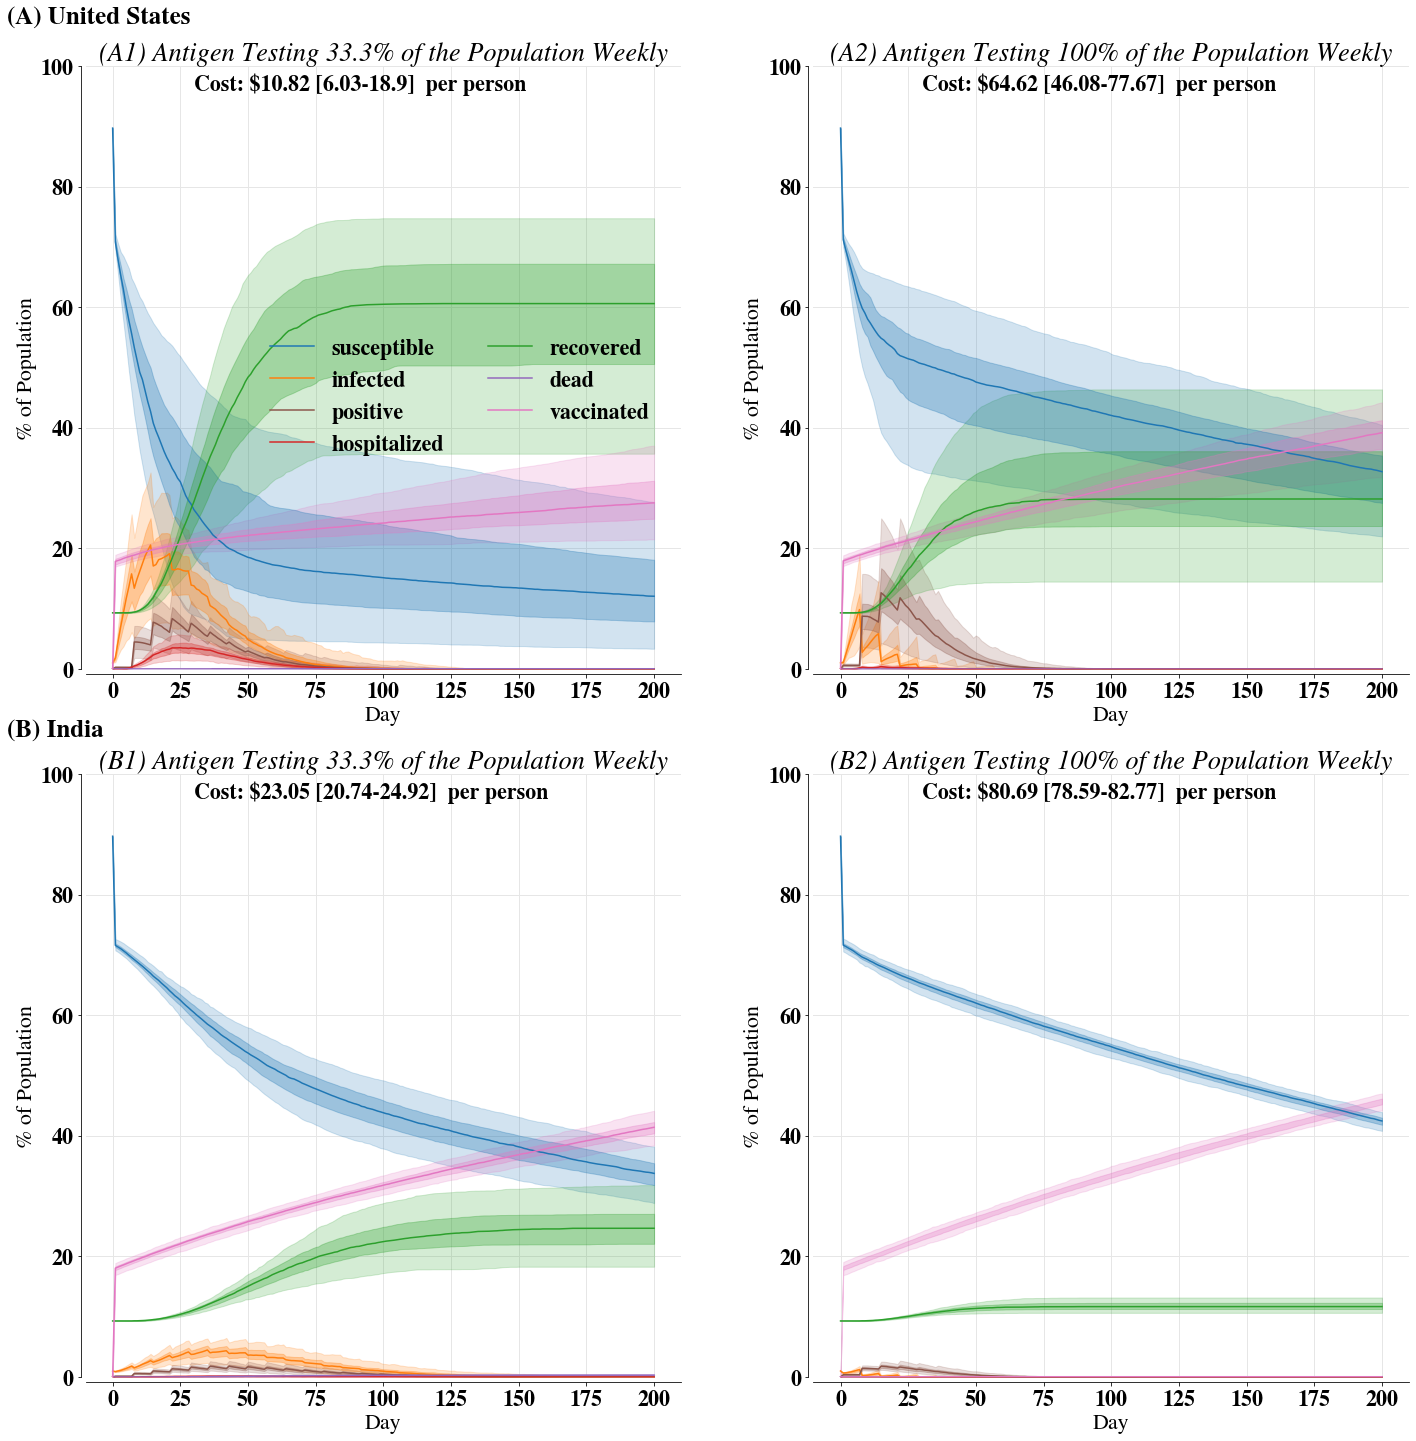

In [13]:
# US
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(222)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis = 'x', direction = 'out')
ax1.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax1.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax1.plot(np.median(r_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax1.plot((np.median(r_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax1.plot(np.median(r_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax1.plot(np.median(r_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax1.plot(np.median(r_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax1.plot(np.median(r_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));
ax1.plot(np.median(r_u_w[0], axis = 0)[8], label = 'vaccinated', color ="C{}".format(6));

ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[8],
                 np.percentile(r_u_w[0], axis = 0, q = 97.5)[8], alpha = 0.2, color = "C{}".format(6))

ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))
ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[8],
                 np.percentile(r_u_w[0], axis = 0, q = 75)[8], alpha = 0.3, color = "C{}".format(6))

ax1.text(30, 96,
         'Cost: $' + str(round(np.median(r_u_w[1]) / 5000,
                               2)) + ' [' + str(round(np.percentile(r_u_w[1], 2.5) / 5000,
                                                      2)) + '-' + str(round(np.percentile(r_u_w[1],
                                                                                          97.5) / 5000,
                                                                            2)) + '] ' + ' per person')

ax1.set_xlabel('Day');
ax1.set_ylabel('% of Population');
ax1.set_title('(A2) Antigen Testing 100% of the Population Weekly', style = 'italic');

ax1.set_ylim([0, 100]);

ax2 = fig.add_subplot(221)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.tick_params(axis = 'x', direction = 'out')
ax2.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax2.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax2.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax2.plot(np.median(r_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax2.plot((np.median(r_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax2.plot(np.median(r_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax2.plot(np.median(r_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax2.plot(np.median(r_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax2.plot(np.median(r_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));
ax2.plot(np.median(r_u_t[0], axis = 0)[8], label = 'vaccinated', color ="C{}".format(6));

ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[8],
                 np.percentile(r_u_t[0], axis = 0, q = 97.5)[8], alpha = 0.2, color = "C{}".format(6))

ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[0],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[4],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[5],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[6],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[7],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))
ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[8],
                 np.percentile(r_u_t[0], axis = 0, q = 75)[8], alpha = 0.3, color = "C{}".format(6))

ax2.text(30, 96, 'Cost: $' + str(round(np.median(r_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax2.legend(loc = (.295, .34), ncol = 2, frameon = False);

ax2.set_xlabel('Day');
ax2.set_ylabel('% of Population');
ax2.set_title('(A1) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

ax2.set_ylim([0, 100]);

# ax3 = fig.add_subplot(424)
# ax3.spines['top'].set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax3.get_xaxis().tick_bottom()
# ax3.get_yaxis().tick_left()
# ax3.tick_params(axis = 'x', direction = 'out')
# ax3.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax3.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax3.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax3.plot(np.median(a_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax3.plot((np.median(a_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax3.plot(np.median(a_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax3.plot(np.median(a_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax3.plot(np.median(a_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax3.plot(np.median(a_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[0],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(a_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[4],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[5],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[6],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[7],
#                  np.percentile(a_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[0],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 25)[3]),
#                  (np.percentile(a_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[4],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[5],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[6],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[7],
#                  np.percentile(a_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax3.text(30, 96, 'Cost: $' + str(round(np.median(a_u_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax3.set_xlabel('Day');
# ax3.set_ylabel('% of Population');
# ax3.set_title('(A4) Antigen Testing 100% of the Population Weekly', style = 'italic');


# ax4 = fig.add_subplot(422)
# ax4.spines['top'].set_visible(False)
# ax4.spines['right'].set_visible(False)
# ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax4.get_xaxis().tick_bottom()
# ax4.get_yaxis().tick_left()
# ax4.tick_params(axis = 'x', direction = 'out')
# ax4.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax4.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax4.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax4.plot(np.median(a_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax4.plot((np.median(a_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax4.plot(np.median(a_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax4.plot(np.median(a_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax4.plot(np.median(a_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax4.plot(np.median(a_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[0],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(a_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[4],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[5],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[6],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[7],
#                  np.percentile(a_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[0],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 25)[3]),
#               (np.percentile(a_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[4],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[5],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[6],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[7],
#                  np.percentile(a_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax4.text(30, 96, 'Cost: $' + str(round(np.median(a_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax4.set_xlabel('Day');
# ax4.set_ylabel('% of Population');
# ax4.set_title('(A2) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

# india

ax5 = fig.add_subplot(224)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax5.get_xaxis().tick_bottom()
ax5.get_yaxis().tick_left()
ax5.tick_params(axis = 'x', direction = 'out')
ax5.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax5.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax5.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax5.plot(np.median(r_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax5.plot((np.median(r_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax5.plot(np.median(r_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax5.plot(np.median(r_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax5.plot(np.median(r_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax5.plot(np.median(r_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));
ax5.plot(np.median(r_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(6));

ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[8],
                 np.percentile(r_i_w[0], axis = 0, q = 97.5)[8], alpha = 0.2, color = "C{}".format(6))

ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))
ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[8],
                 np.percentile(r_i_w[0], axis = 0, q = 75)[8], alpha = 0.3, color = "C{}".format(6))

ax5.text(30, 96, 'Cost: $' + str(round(np.median(r_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax5.set_xlabel('Day');
ax5.set_ylabel('% of Population');
ax5.set_title('(B2) Antigen Testing 100% of the Population Weekly', style = 'italic');

ax5.set_ylim([0, 100]);

ax6 = fig.add_subplot(223)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax6.get_xaxis().tick_bottom()
ax6.get_yaxis().tick_left()
ax6.tick_params(axis = 'x', direction = 'out')
ax6.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax6.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax6.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax6.plot(np.median(r_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax6.plot((np.median(r_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax6.plot(np.median(r_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax6.plot(np.median(r_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax6.plot(np.median(r_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax6.plot(np.median(r_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));
ax6.plot(np.median(r_i_t[0], axis = 0)[8], label = 'vaccinated', color ="C{}".format(6));

ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(r_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[8],
                 np.percentile(r_i_t[0], axis = 0, q = 97.5)[8], alpha = 0.2, color = "C{}".format(6))

ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[0],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 25)[3]),
                 (np.percentile(r_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[4],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[5],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[6],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[7],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))
ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[8],
                 np.percentile(r_i_t[0], axis = 0, q = 75)[8], alpha = 0.3, color = "C{}".format(6))

ax6.text(30, 96, 'Cost: $' + str(round(np.median(r_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax6.set_xlabel('Day');
ax6.set_ylabel('% of Population');
ax6.set_title('(B1) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

ax6.set_ylim([0, 100]);

# ax7 = fig.add_subplot(428)
# ax7.spines['top'].set_visible(False)
# ax7.spines['right'].set_visible(False)
# ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax7.get_xaxis().tick_bottom()
# ax7.get_yaxis().tick_left()
# ax7.tick_params(axis = 'x', direction = 'out')
# ax7.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax7.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax7.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax7.plot(np.median(a_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax7.plot((np.median(a_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax7.plot(np.median(a_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax7.plot(np.median(a_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax7.plot(np.median(a_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax7.plot(np.median(a_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[0],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(a_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[4],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[5],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[6],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[7],
#                  np.percentile(a_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[0],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 25)[3]),
#                  (np.percentile(a_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[4],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[5],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[6],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[7],
#                  np.percentile(a_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax7.text(30, 96, 'Cost: $' + str(round(np.median(a_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax7.set_xlabel('Day');
# ax7.set_ylabel('% of Population');
# ax7.set_title('(B4) Antigen Testing 100% of the Population Weekly', style = 'italic');


# ax8 = fig.add_subplot(426)
# ax8.spines['top'].set_visible(False)
# ax8.spines['right'].set_visible(False)
# ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax8.get_xaxis().tick_bottom()
# ax8.get_yaxis().tick_left()
# ax8.tick_params(axis = 'x', direction = 'out')
# ax8.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax8.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax8.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax8.plot(np.median(a_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax8.plot((np.median(a_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax8.plot(np.median(a_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax8.plot(np.median(a_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax8.plot(np.median(a_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax8.plot(np.median(a_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[0],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(a_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[4],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[5],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[6],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[7],
#                  np.percentile(a_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[0],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 25)[3]),
#               (np.percentile(a_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[4],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[5],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[6],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[7],
#                  np.percentile(a_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax8.text(30, 96, 'Cost: $' + str(round(np.median(a_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax8.set_xlabel('Day');
# ax8.set_ylabel('% of Population');
# ax8.set_title('(B2) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'fig6A-representative-20%vaccinated.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'fig6A-representative-20%vaccinated.pdf'), dpi = 300, bbox_inches = 'tight')

'NimbusRoman-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


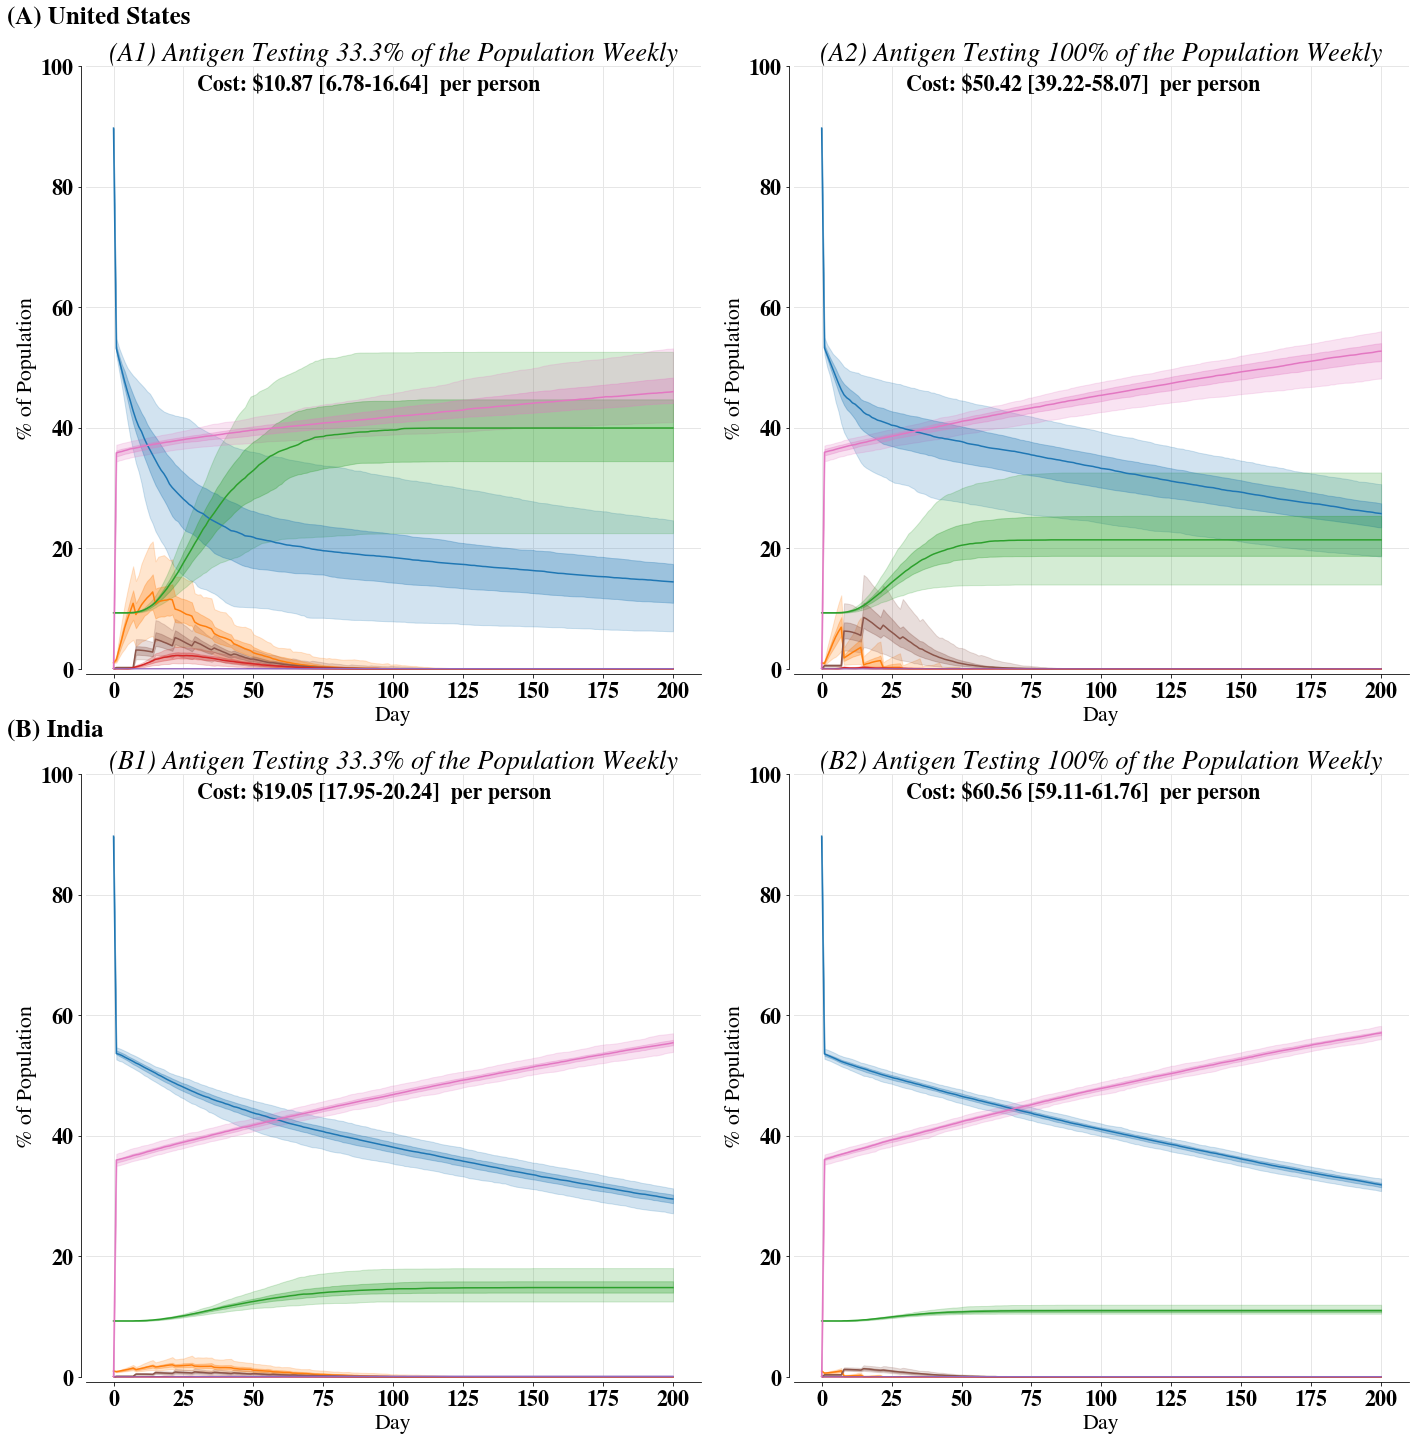

In [14]:
# US
fig = plt.figure(figsize = (20, 20))
# ax1 = fig.add_subplot(423)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax1.get_xaxis().tick_bottom()
# ax1.get_yaxis().tick_left()
# ax1.tick_params(axis = 'x', direction = 'out')
# ax1.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax1.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax1.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax1.plot(np.median(r_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax1.plot((np.median(r_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax1.plot(np.median(r_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax1.plot(np.median(r_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax1.plot(np.median(r_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax1.plot(np.median(r_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[0],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(r_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[4],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[5],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[6],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 2.5)[7],
#                  np.percentile(r_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[0],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax1.fill_between(range(max_steps), (np.percentile(r_u_w[0], axis = 0, q = 25)[3]),
#                  (np.percentile(r_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[4],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[5],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[6],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax1.fill_between(range(max_steps), np.percentile(r_u_w[0], axis = 0, q = 25)[7],
#                  np.percentile(r_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax1.text(30, 96,
#          'Cost: $' + str(round(np.median(r_u_w[1]) / 5000,
#                                2)) + ' [' + str(round(np.percentile(r_u_w[1], 2.5) / 5000,
#                                                       2)) + '-' + str(round(np.percentile(r_u_w[1],
#                                                                                           97.5) / 5000,
#                                                                             2)) + '] ' + ' per person')

# ax1.set_xlabel('Day');
# ax1.set_ylabel('% of Population');
# ax1.set_title('(A3) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

# ax2 = fig.add_subplot(421)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax2.get_xaxis().tick_bottom()
# ax2.get_yaxis().tick_left()
# ax2.tick_params(axis = 'x', direction = 'out')
# ax2.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax2.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax2.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax2.plot(np.median(r_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax2.plot((np.median(r_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax2.plot(np.median(r_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax2.plot(np.median(r_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax2.plot(np.median(r_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax2.plot(np.median(r_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[0],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(r_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[4],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[5],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[6],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 2.5)[7],
#                  np.percentile(r_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[0],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax2.fill_between(range(max_steps), (np.percentile(r_u_t[0], axis = 0, q = 25)[3]),
#                  (np.percentile(r_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[4],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[5],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[6],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax2.fill_between(range(max_steps), np.percentile(r_u_t[0], axis = 0, q = 25)[7],
#                  np.percentile(r_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax2.text(30, 96, 'Cost: $' + str(round(np.median(r_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax2.legend(loc = (.295, .34), ncol = 2, frameon = False);

# ax2.set_xlabel('Day');
# ax2.set_ylabel('% of Population');
# ax2.set_title('(A1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



ax3 = fig.add_subplot(222)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
ax3.tick_params(axis = 'x', direction = 'out')
ax3.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax3.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax3.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax3.plot(np.median(a_u_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax3.plot((np.median(a_u_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax3.plot(np.median(a_u_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax3.plot(np.median(a_u_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax3.plot(np.median(a_u_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax3.plot(np.median(a_u_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));
ax3.plot(np.median(a_u_w[0], axis = 0)[8], label = 'vaccinated', color ="C{}".format(6));

ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_u_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 2.5)[8],
                 np.percentile(a_u_w[0], axis = 0, q = 97.5)[8], alpha = 0.2, color = "C{}".format(6))

ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[0],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax3.fill_between(range(max_steps), (np.percentile(a_u_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_u_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[4],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[5],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[6],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[7],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))
ax3.fill_between(range(max_steps), np.percentile(a_u_w[0], axis = 0, q = 25)[8],
                 np.percentile(a_u_w[0], axis = 0, q = 75)[8], alpha = 0.3, color = "C{}".format(6))

ax3.text(30, 96, 'Cost: $' + str(round(np.median(a_u_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax3.set_xlabel('Day');
ax3.set_ylabel('% of Population');
ax3.set_title('(A2) Antigen Testing 100% of the Population Weekly', style = 'italic');

ax3.set_ylim([0, 100])

ax4 = fig.add_subplot(221)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax4.get_xaxis().tick_bottom()
ax4.get_yaxis().tick_left()
ax4.tick_params(axis = 'x', direction = 'out')
ax4.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax4.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax4.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax4.plot(np.median(a_u_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax4.plot((np.median(a_u_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax4.plot(np.median(a_u_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax4.plot(np.median(a_u_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax4.plot(np.median(a_u_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax4.plot(np.median(a_u_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));
ax4.plot(np.median(a_u_t[0], axis = 0)[8], label = 'vaccinated', color ="C{}".format(6));

ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_u_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 2.5)[8],
                 np.percentile(a_u_t[0], axis = 0, q = 97.5)[8], alpha = 0.2, color = "C{}".format(6))

ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[0],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax4.fill_between(range(max_steps), (np.percentile(a_u_t[0], axis = 0, q = 25)[3]),
              (np.percentile(a_u_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[4],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[5],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[6],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[7],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))
ax4.fill_between(range(max_steps), np.percentile(a_u_t[0], axis = 0, q = 25)[8],
                 np.percentile(a_u_t[0], axis = 0, q = 75)[8], alpha = 0.3, color = "C{}".format(6))

ax4.text(30, 96, 'Cost: $' + str(round(np.median(a_u_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_u_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_u_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax4.set_xlabel('Day');
ax4.set_ylabel('% of Population');
ax4.set_title('(A1) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

ax4.set_ylim([0, 100])

# india

# ax5 = fig.add_subplot(427)
# ax5.spines['top'].set_visible(False)
# ax5.spines['right'].set_visible(False)
# ax5.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax5.get_xaxis().tick_bottom()
# ax5.get_yaxis().tick_left()
# ax5.tick_params(axis = 'x', direction = 'out')
# ax5.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax5.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax5.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax5.plot(np.median(r_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax5.plot((np.median(r_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax5.plot(np.median(r_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax5.plot(np.median(r_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax5.plot(np.median(r_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax5.plot(np.median(r_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[0],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(r_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[4],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[5],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[6],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 2.5)[7],
#                  np.percentile(r_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[0],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax5.fill_between(range(max_steps), (np.percentile(r_i_w[0], axis = 0, q = 25)[3]),
#                  (np.percentile(r_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[4],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[5],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[6],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax5.fill_between(range(max_steps), np.percentile(r_i_w[0], axis = 0, q = 25)[7],
#                  np.percentile(r_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax5.text(30, 96, 'Cost: $' + str(round(np.median(r_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax5.set_xlabel('Day');
# ax5.set_ylabel('% of Population');
# ax5.set_title('(B3) RT-PCR Testing 100% of the Population Weekly', style = 'italic');

# ax6 = fig.add_subplot(425)
# ax6.spines['top'].set_visible(False)
# ax6.spines['right'].set_visible(False)
# ax6.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
# ax6.get_xaxis().tick_bottom()
# ax6.get_yaxis().tick_left()
# ax6.tick_params(axis = 'x', direction = 'out')
# ax6.tick_params(axis = 'y', direction = 'out')
# # offset the spines
# for spine in ax6.spines.values():
#     spine.set_position(('outward', 5))
# # put the grid behind
# ax6.set_axisbelow(True)

# # look at the sird curve for multiple runs (should add "E" at some point)
# ax6.plot(np.median(r_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
# ax6.plot((np.median(r_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
# ax6.plot(np.median(r_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
# ax6.plot(np.median(r_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
# ax6.plot(np.median(r_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
# ax6.plot(np.median(r_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));

# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[0],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
# ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 2.5)[3]),
#                  (np.percentile(r_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[4],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[5],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[6],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 2.5)[7],
#                  np.percentile(r_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))

# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[0],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
# ax6.fill_between(range(max_steps), (np.percentile(r_i_t[0], axis = 0, q = 25)[3]),
#                  (np.percentile(r_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[4],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[5],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[6],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
# ax6.fill_between(range(max_steps), np.percentile(r_i_t[0], axis = 0, q = 25)[7],
#                  np.percentile(r_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))

# ax6.text(30, 96, 'Cost: $' + str(round(np.median(r_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(r_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(r_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

# ax6.set_xlabel('Day');
# ax6.set_ylabel('% of Population');
# ax6.set_title('(B1) RT-PCR Testing 33.3% of the Population Weekly', style = 'italic');



ax7 = fig.add_subplot(224)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax7.get_xaxis().tick_bottom()
ax7.get_yaxis().tick_left()
ax7.tick_params(axis = 'x', direction = 'out')
ax7.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax7.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax7.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax7.plot(np.median(a_i_w[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax7.plot((np.median(a_i_w[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax7.plot(np.median(a_i_w[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax7.plot(np.median(a_i_w[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax7.plot(np.median(a_i_w[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax7.plot(np.median(a_i_w[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));
ax7.plot(np.median(a_i_w[0], axis = 0)[8], label = 'vaccinated', color ="C{}".format(6));

ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_i_w[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 2.5)[8],
                 np.percentile(a_i_w[0], axis = 0, q = 97.5)[8], alpha = 0.2, color = "C{}".format(6))

ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[0],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax7.fill_between(range(max_steps), (np.percentile(a_i_w[0], axis = 0, q = 25)[3]),
                 (np.percentile(a_i_w[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[4],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[5],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[6],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[7],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))
ax7.fill_between(range(max_steps), np.percentile(a_i_w[0], axis = 0, q = 25)[8],
                 np.percentile(a_i_w[0], axis = 0, q = 75)[8], alpha = 0.3, color = "C{}".format(6))

ax7.text(30, 96, 'Cost: $' + str(round(np.median(a_i_w[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_w[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_w[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax7.set_xlabel('Day');
ax7.set_ylabel('% of Population');
ax7.set_title('(B2) Antigen Testing 100% of the Population Weekly', style = 'italic');

ax7.set_ylim([0, 100])

ax8 = fig.add_subplot(223)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.grid(axis='both', color="0.9", linestyle='-', linewidth=1)
ax8.get_xaxis().tick_bottom()
ax8.get_yaxis().tick_left()
ax8.tick_params(axis = 'x', direction = 'out')
ax8.tick_params(axis = 'y', direction = 'out')
# offset the spines
for spine in ax8.spines.values():
    spine.set_position(('outward', 5))
# put the grid behind
ax8.set_axisbelow(True)

# look at the sird curve for multiple runs (should add "E" at some point)
ax8.plot(np.median(a_i_t[0], axis = 0)[0], label = 'susceptible', color = "C{}".format(0));
ax8.plot((np.median(a_i_t[0], axis = 0)[3]), label = 'infected', color = "C{}".format(1));
ax8.plot(np.median(a_i_t[0], axis = 0)[4], label = 'positive', color = "C{}".format(5));
ax8.plot(np.median(a_i_t[0], axis = 0)[7], label = 'hospitalized', color = "C{}".format(3));
ax8.plot(np.median(a_i_t[0], axis = 0)[5], label = 'recovered', color = "C{}".format(2));
ax8.plot(np.median(a_i_t[0], axis = 0)[6], label = 'dead', color ="C{}".format(4));
ax8.plot(np.median(a_i_t[0], axis = 0)[8], label = 'vaccinated', color ="C{}".format(6));

ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[0],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[0], alpha = 0.2, color = "C{}".format(0))
ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 2.5)[3]),
                 (np.percentile(a_i_t[0], axis = 0, q = 97.5)[3]), alpha = 0.2, color = "C{}".format(1))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[4],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[4], alpha = 0.2, color = "C{}".format(5))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[5],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[5], alpha = 0.2, color = "C{}".format(2))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[6],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[6], alpha = 0.2, color = "C{}".format(4))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[7],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[7], alpha = 0.2, color = "C{}".format(3))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 2.5)[8],
                 np.percentile(a_i_t[0], axis = 0, q = 97.5)[8], alpha = 0.2, color = "C{}".format(6))

ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[0],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[0], alpha = 0.3, color = "C{}".format(0))
ax8.fill_between(range(max_steps), (np.percentile(a_i_t[0], axis = 0, q = 25)[3]),
              (np.percentile(a_i_t[0], axis = 0, q = 75)[3]), alpha = 0.3, color = "C{}".format(1))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[4],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[4], alpha = 0.3, color = "C{}".format(5))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[5],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[5], alpha = 0.3, color = "C{}".format(2))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[6],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[6], alpha = 0.3, color = "C{}".format(4))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[7],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[7], alpha = 0.3, color = "C{}".format(3))
ax8.fill_between(range(max_steps), np.percentile(a_i_t[0], axis = 0, q = 25)[8],
                 np.percentile(a_i_t[0], axis = 0, q = 75)[8], alpha = 0.3, color = "C{}".format(6))

ax8.text(30, 96, 'Cost: $' + str(round(np.median(a_i_t[1]) / 5000, 2)) + ' [' + str(round(np.percentile(a_i_t[1], 2.5) / 5000, 2)) + '-' + str(round(np.percentile(a_i_t[1], 97.5) / 5000, 2)) + '] ' + ' per person')

ax8.set_xlabel('Day');
ax8.set_ylabel('% of Population');
ax8.set_title('(B1) Antigen Testing 33.3% of the Population Weekly', style = 'italic');

ax8.set_ylim([0, 100])

fig.text(0.01, 1.00, "(A) United States", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.text(0.01, 0.505, "(B) India", fontsize = 25,
         weight="bold", horizontalalignment='left', verticalalignment='center');

fig.tight_layout();

fig.savefig(os.path.join(fig_dir, 'fig6B-representative-40%vaccinated.png'), dpi = 300, bbox_inches = 'tight')
fig.savefig(os.path.join(fig_dir, 'fig6B-representative-40%vaccinated.pdf'), dpi = 300, bbox_inches = 'tight')